In [1]:
import os
import csv
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.optimize as opt
import scipy.stats as stat
from operator import itemgetter
import random
import numpy as np
import numpy.ma as ma
import numpy.linalg as la

pi = np.pi
sin = np.sin
cos = np.cos

In [2]:
os.chdir('..')
cwd = os.getcwd()
cwd

'/Users/mike_mckenna/Desktop/brain-diffusion/Chad_functions_and_unittests'

In [3]:
MSD_dict_7 = dict()

MSD_dict_7[1] = np.genfromtxt('./Data_Files_Mike/8_30_17 - MPT in brain sections/PS_COOH/geoM2xy_green_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_7[2] = np.genfromtxt('./Data_Files_Mike/8_30_17 - MPT in brain sections/PS_PEG/geoM2xy_green_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')

In [5]:
fps_vals_7 = [5, 5]

time_dict_7 = dict()

i = 1
while i <= len(MSD_dict_7):
    time_dict_7[i] = np.zeros(len(MSD_dict_7[i]))
    p = 0
    while p < len(time_dict_7[i]):
        time_dict_7[i][p] = p/fps_vals_7[i-1]
        p += 1
    i += 1

In [6]:
MSD_dict_9 = dict()

MSD_dict_9[1] = np.genfromtxt('./Data_Files_Mike/9_6_17 - MPT in brain sections/PS_COOH/geoM2xy_PS_COOH_section_1_vid_1.csv', delimiter = ',')
MSD_dict_9[2] = np.genfromtxt('./Data_Files_Mike/9_6_17 - MPT in brain sections/PS_PEG/geoM2xy_PS_PEG_section_2_vid_1.csv', delimiter = ',')

In [7]:
MSD_dict_4 = dict()

MSD_dict_4[1] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_1/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[2] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_3/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[3] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_5/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[4] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_7/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[5] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_2/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[6] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_4/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[7] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_6/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[8] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_8/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[9] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_1/new_2_geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[10] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_3/new_2_geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[11] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_5/new_2_geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[12] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_7/new_2_geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[13] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_2/new_2_geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[14] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_4/new_2_geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[15] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_6/new_2_geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_4[16] = np.genfromtxt('./Data_Files_Mike/8_16_17 - MPT_100nm_PS_in_0_4_agarose gel/well_8/new_2_geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')

MSD_dict_4[17] = np.zeros(len(MSD_dict_4[9]))
MSD_dict_4[18] = np.zeros(len(MSD_dict_4[9]))
p = 0
while p < len(MSD_dict_4[9]):
    MSD_dict_4[17][p] = np.mean([MSD_dict_4[9][p],MSD_dict_4[10][p]])
    MSD_dict_4[18][p] = np.std([MSD_dict_4[9][p],MSD_dict_4[10][p]])
    p += 1

In [8]:
MSD_dict_6 = dict()

MSD_dict_6[1] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_1/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_6[2] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_3/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_6[3] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_2/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_6[4] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_4/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_6[5] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_5/geoM2xy_PS_COOH_in_0_4_agarose_gel_HA_vid_1.csv', delimiter = ',')
MSD_dict_6[6] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_7/geoM2xy_PS_COOH_in_0_4_agarose_gel_HA_vid_1.csv', delimiter = ',')
MSD_dict_6[7] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_6/geoM2xy_PS_PEG_in_0_4_agarose_gel_HA_vid_1.csv', delimiter = ',')
MSD_dict_6[8] = np.genfromtxt('./Data_Files_Mike/8_28_17 - MPT_100nm_PS_in_HA_agarose gel/well_8/geoM2xy_PS_PEG_in_0_4_agarose_gel_HA_vid_1.csv', delimiter = ',')

MSD_dict_6[9] = np.zeros(len(MSD_dict_6[3]))
MSD_dict_6[10] = np.zeros(len(MSD_dict_6[3]))
p = 0
while p < len(MSD_dict_6[3]):
    MSD_dict_6[9][p] = np.mean([MSD_dict_6[3][p],MSD_dict_6[4][p]])
    MSD_dict_6[10][p] = np.std([MSD_dict_6[3][p],MSD_dict_6[4][p]])
    p += 1
   
MSD_dict_6[11] = np.zeros(len(MSD_dict_6[1]))
MSD_dict_6[12] = np.zeros(len(MSD_dict_6[1]))
p = 0
while p < len(MSD_dict_6[1]):
    MSD_dict_6[11][p] = np.mean([MSD_dict_6[1][p],MSD_dict_6[2][p]])
    MSD_dict_6[12][p] = np.std([MSD_dict_6[1][p],MSD_dict_6[2][p]])
    p += 1
    
MSD_dict_6[13] = np.zeros(len(MSD_dict_6[1]))
MSD_dict_6[14] = np.zeros(len(MSD_dict_6[1]))
p = 0
while p < len(MSD_dict_6[1]):
    MSD_dict_6[13][p] = np.mean([MSD_dict_6[5][p],MSD_dict_6[6][p]])
    MSD_dict_6[14][p] = np.std([MSD_dict_6[5][p],MSD_dict_6[6][p]])
    p += 1
    
MSD_dict_6[15] = np.zeros(len(MSD_dict_6[1]))
MSD_dict_6[16] = np.zeros(len(MSD_dict_6[1]))
p = 0
while p < len(MSD_dict_6[1]):
    MSD_dict_6[15][p] = np.mean([MSD_dict_6[7][p],MSD_dict_6[8][p]])
    MSD_dict_6[16][p] = np.std([MSD_dict_6[7][p],MSD_dict_6[8][p]])
    p += 1

In [9]:
MSD_dict_13 = dict()

MSD_dict_13[1] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_1/geoM2xy_PS_COOH_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_13[2] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_3/geoM2xy_PS_COOH_in_0_2_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_13[3] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_5/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_13[4] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_7/geoM2xy_PS_COOH_in_0_8_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_13[5] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_2/geoM2xy_PS_PEG_in_0_1_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_13[6] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_4/geoM2xy_PS_PEG_in_0_2_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_13[7] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_6/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_13[8] = np.genfromtxt('./Data_Files_Mike/9_19_17 - MPT varying agarose conc/well_8/geoM2xy_PS_PEG_in_0_8_agarose_gel_vid_1.csv', delimiter = ',')

In [10]:
fps_vals_8 = [9.91, 9.91, 9.91, 9.91, 9.91, 9.91, 9.91, 9.91, 9.91, 9.91, 9.91, 9.91]

time_dict_8 = dict()

i = 1
while i <= len(MSD_dict_13):
    time_dict_8[i] = np.zeros(len(MSD_dict_13[i]))
    p = 0
    while p < len(time_dict_8[i]):
        time_dict_8[i][p] = p/fps_vals_8[i-1]
        p += 1
    i += 1

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


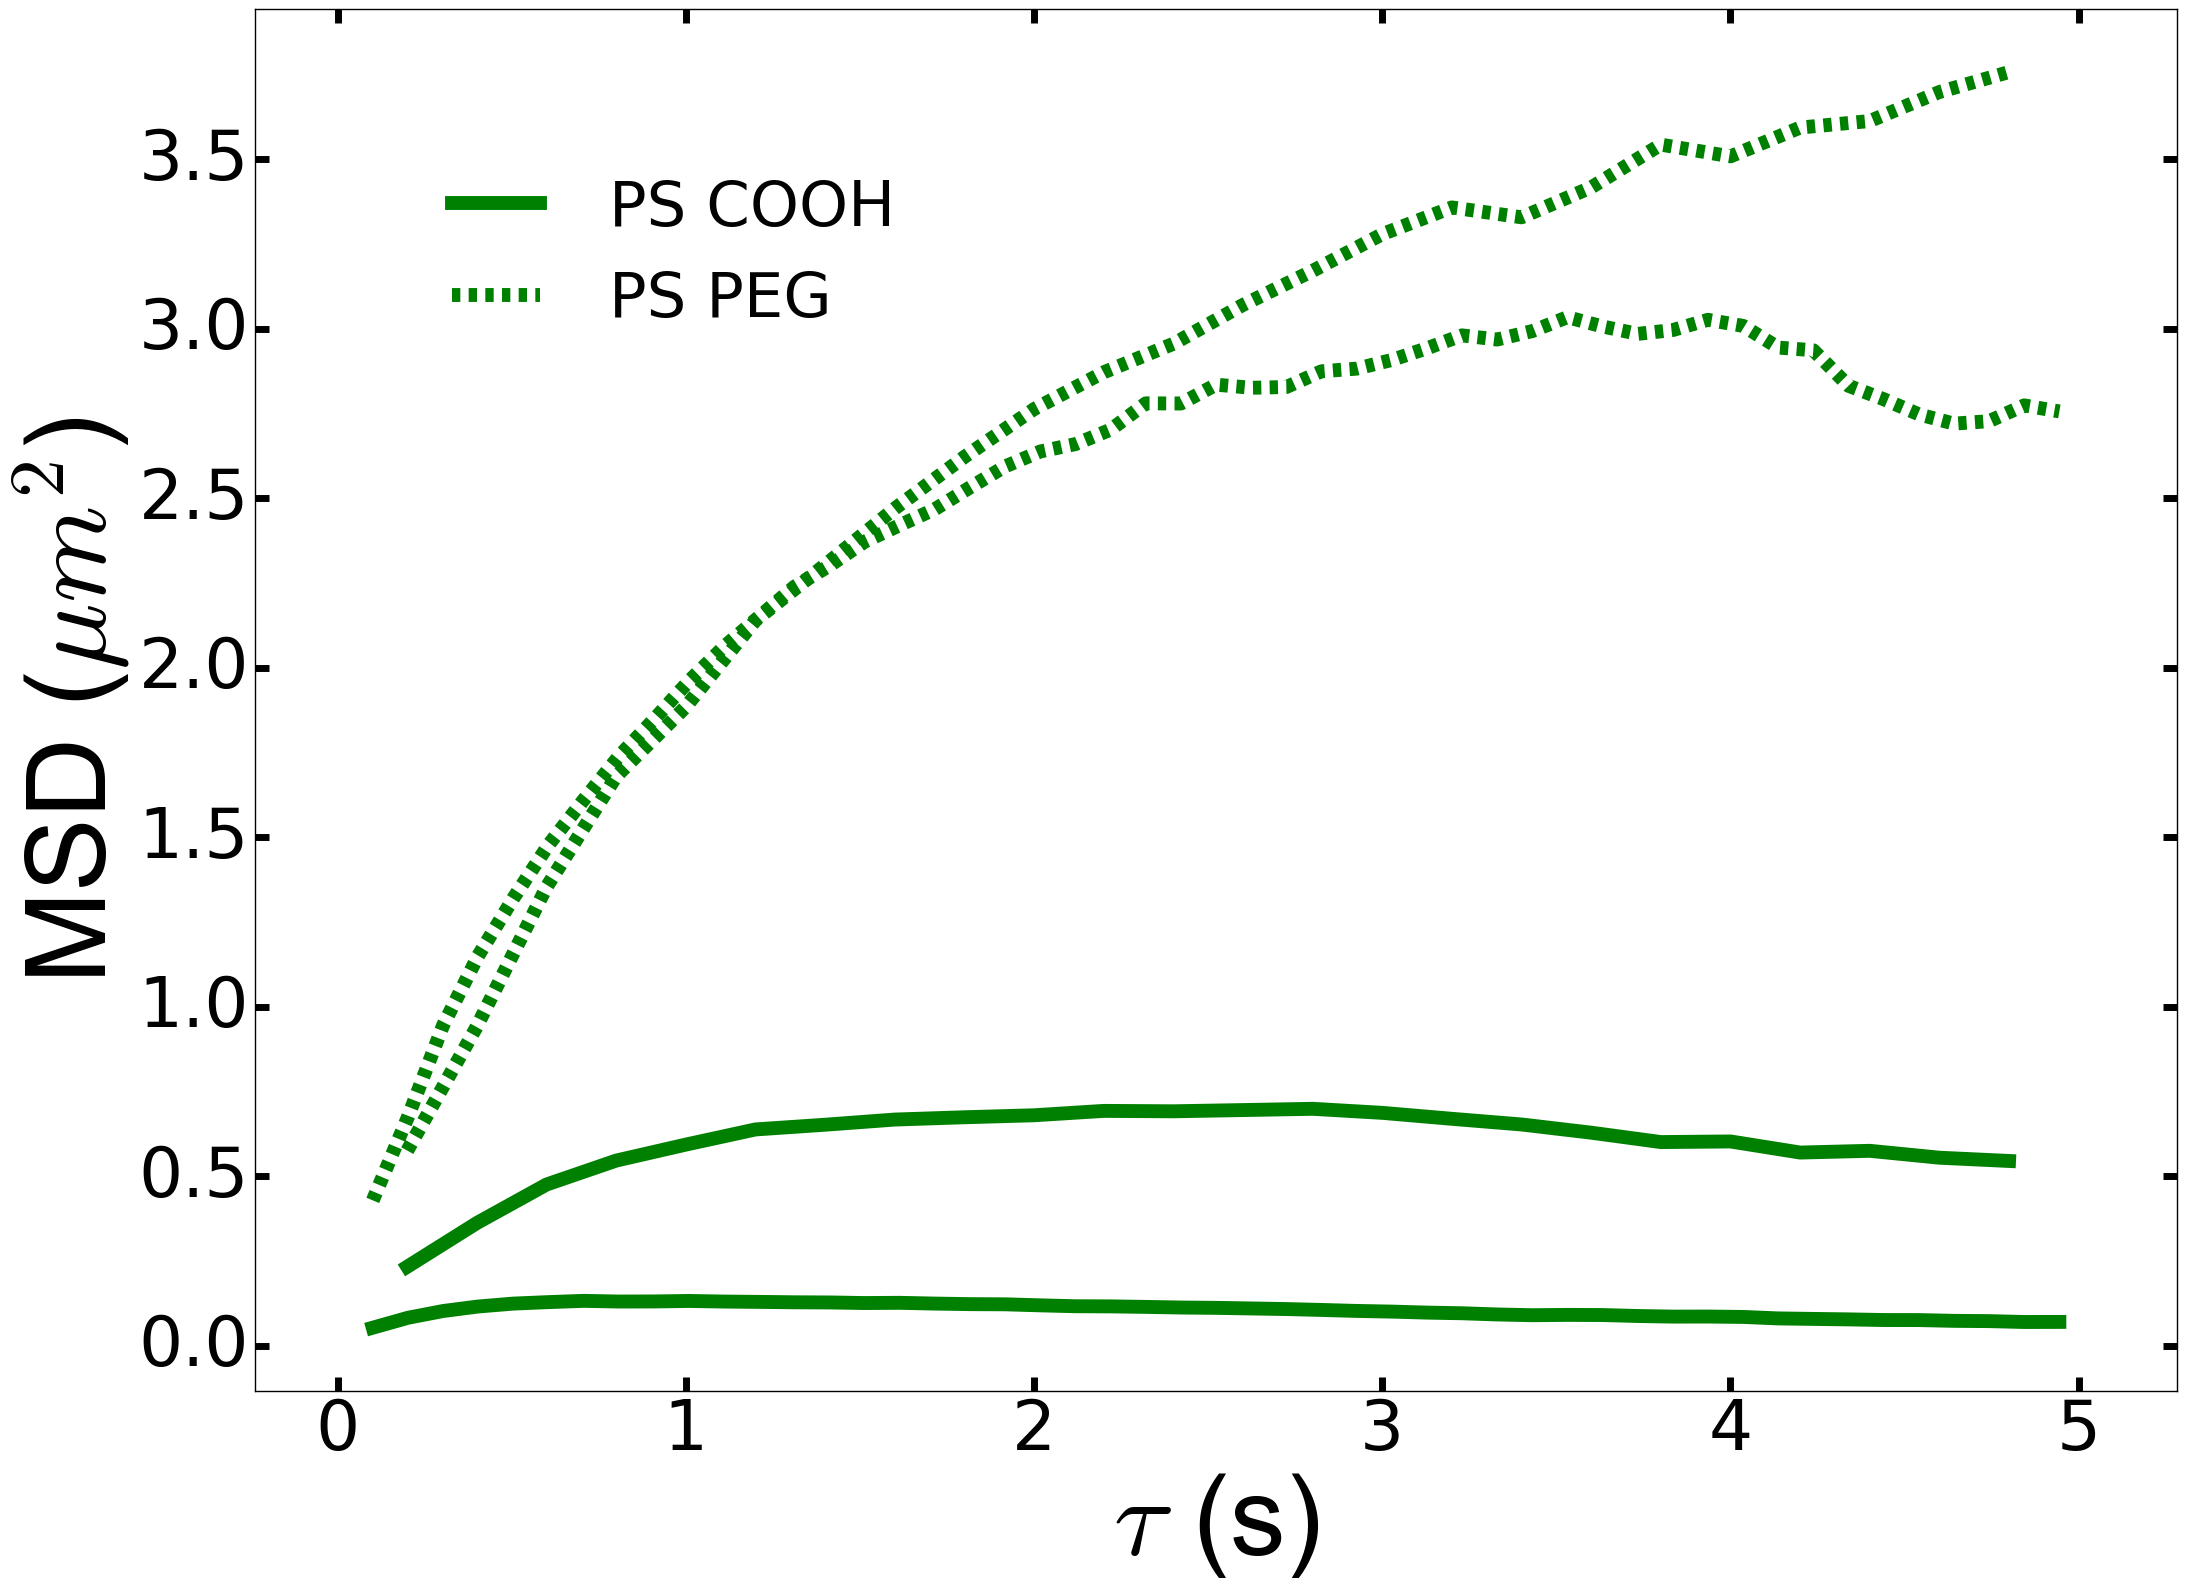

In [11]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_7[1][1:(np.ceil(5*fps_vals_7[0]))], MSD_dict_7[1][1:(np.ceil(5*fps_vals_7[0]))], linewidth=10, color = 'green', label = 'PS COOH')
ax.plot(time_dict_7[2][1:(np.ceil(5*fps_vals_7[1]))], MSD_dict_7[2][1:(np.ceil(5*fps_vals_7[1]))], linewidth=10, linestyle = '--', color = 'green', label = 'PS PEG')
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_9[1][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color = 'green')
ax.plot(time_dict_8[2][1:(np.ceil(5*fps_vals_8[1]))], MSD_dict_9[2][1:(np.ceil(5*fps_vals_8[1]))], linewidth=10, color = 'green', linestyle = '--')
ax.legend(loc = (0.08, 0.75),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.margins(0.07,0.05)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('MPT_brain_tissue_new.png', dpi=fig.dpi)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


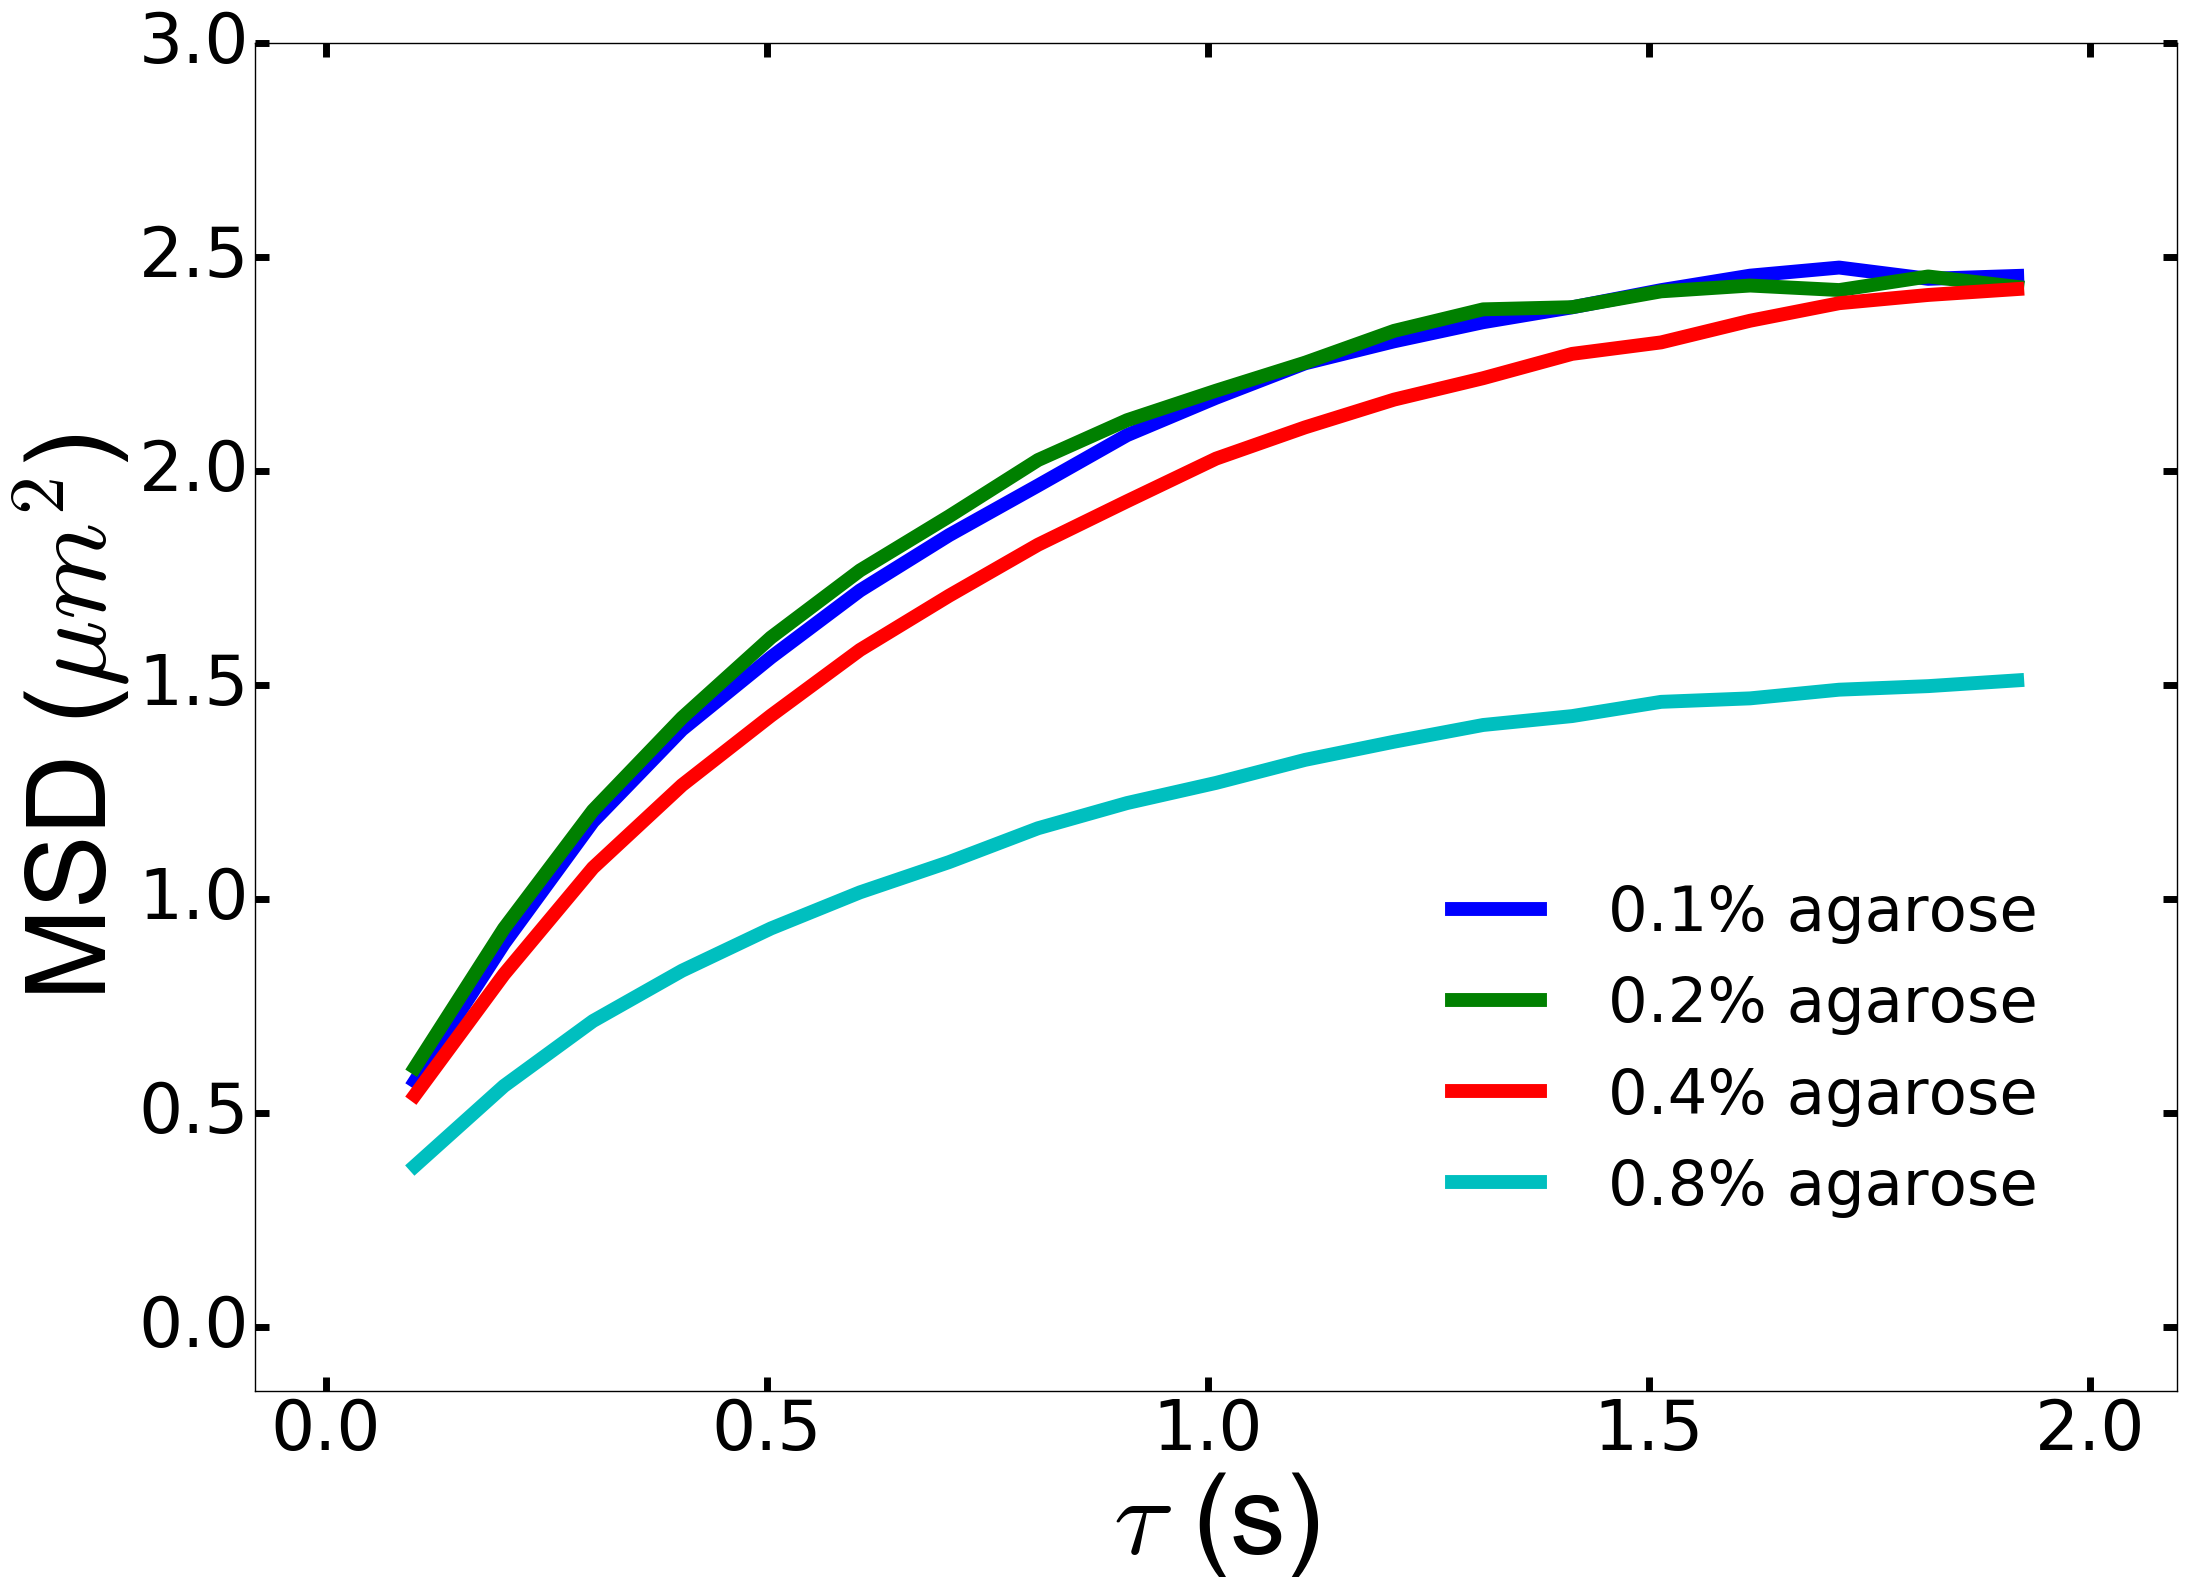

In [12]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[1][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, label = '0.1% agarose')
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[2][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, label = '0.2% agarose')
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[3][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, label = '0.4% agarose')
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[4][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, label = '0.8% agarose')
ax.legend(loc = (0.6, 0.11),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.margins(0.1,0.25)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('PS_COOH_MSDs_varying_agarose_conc_new.png', dpi=fig.dpi)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


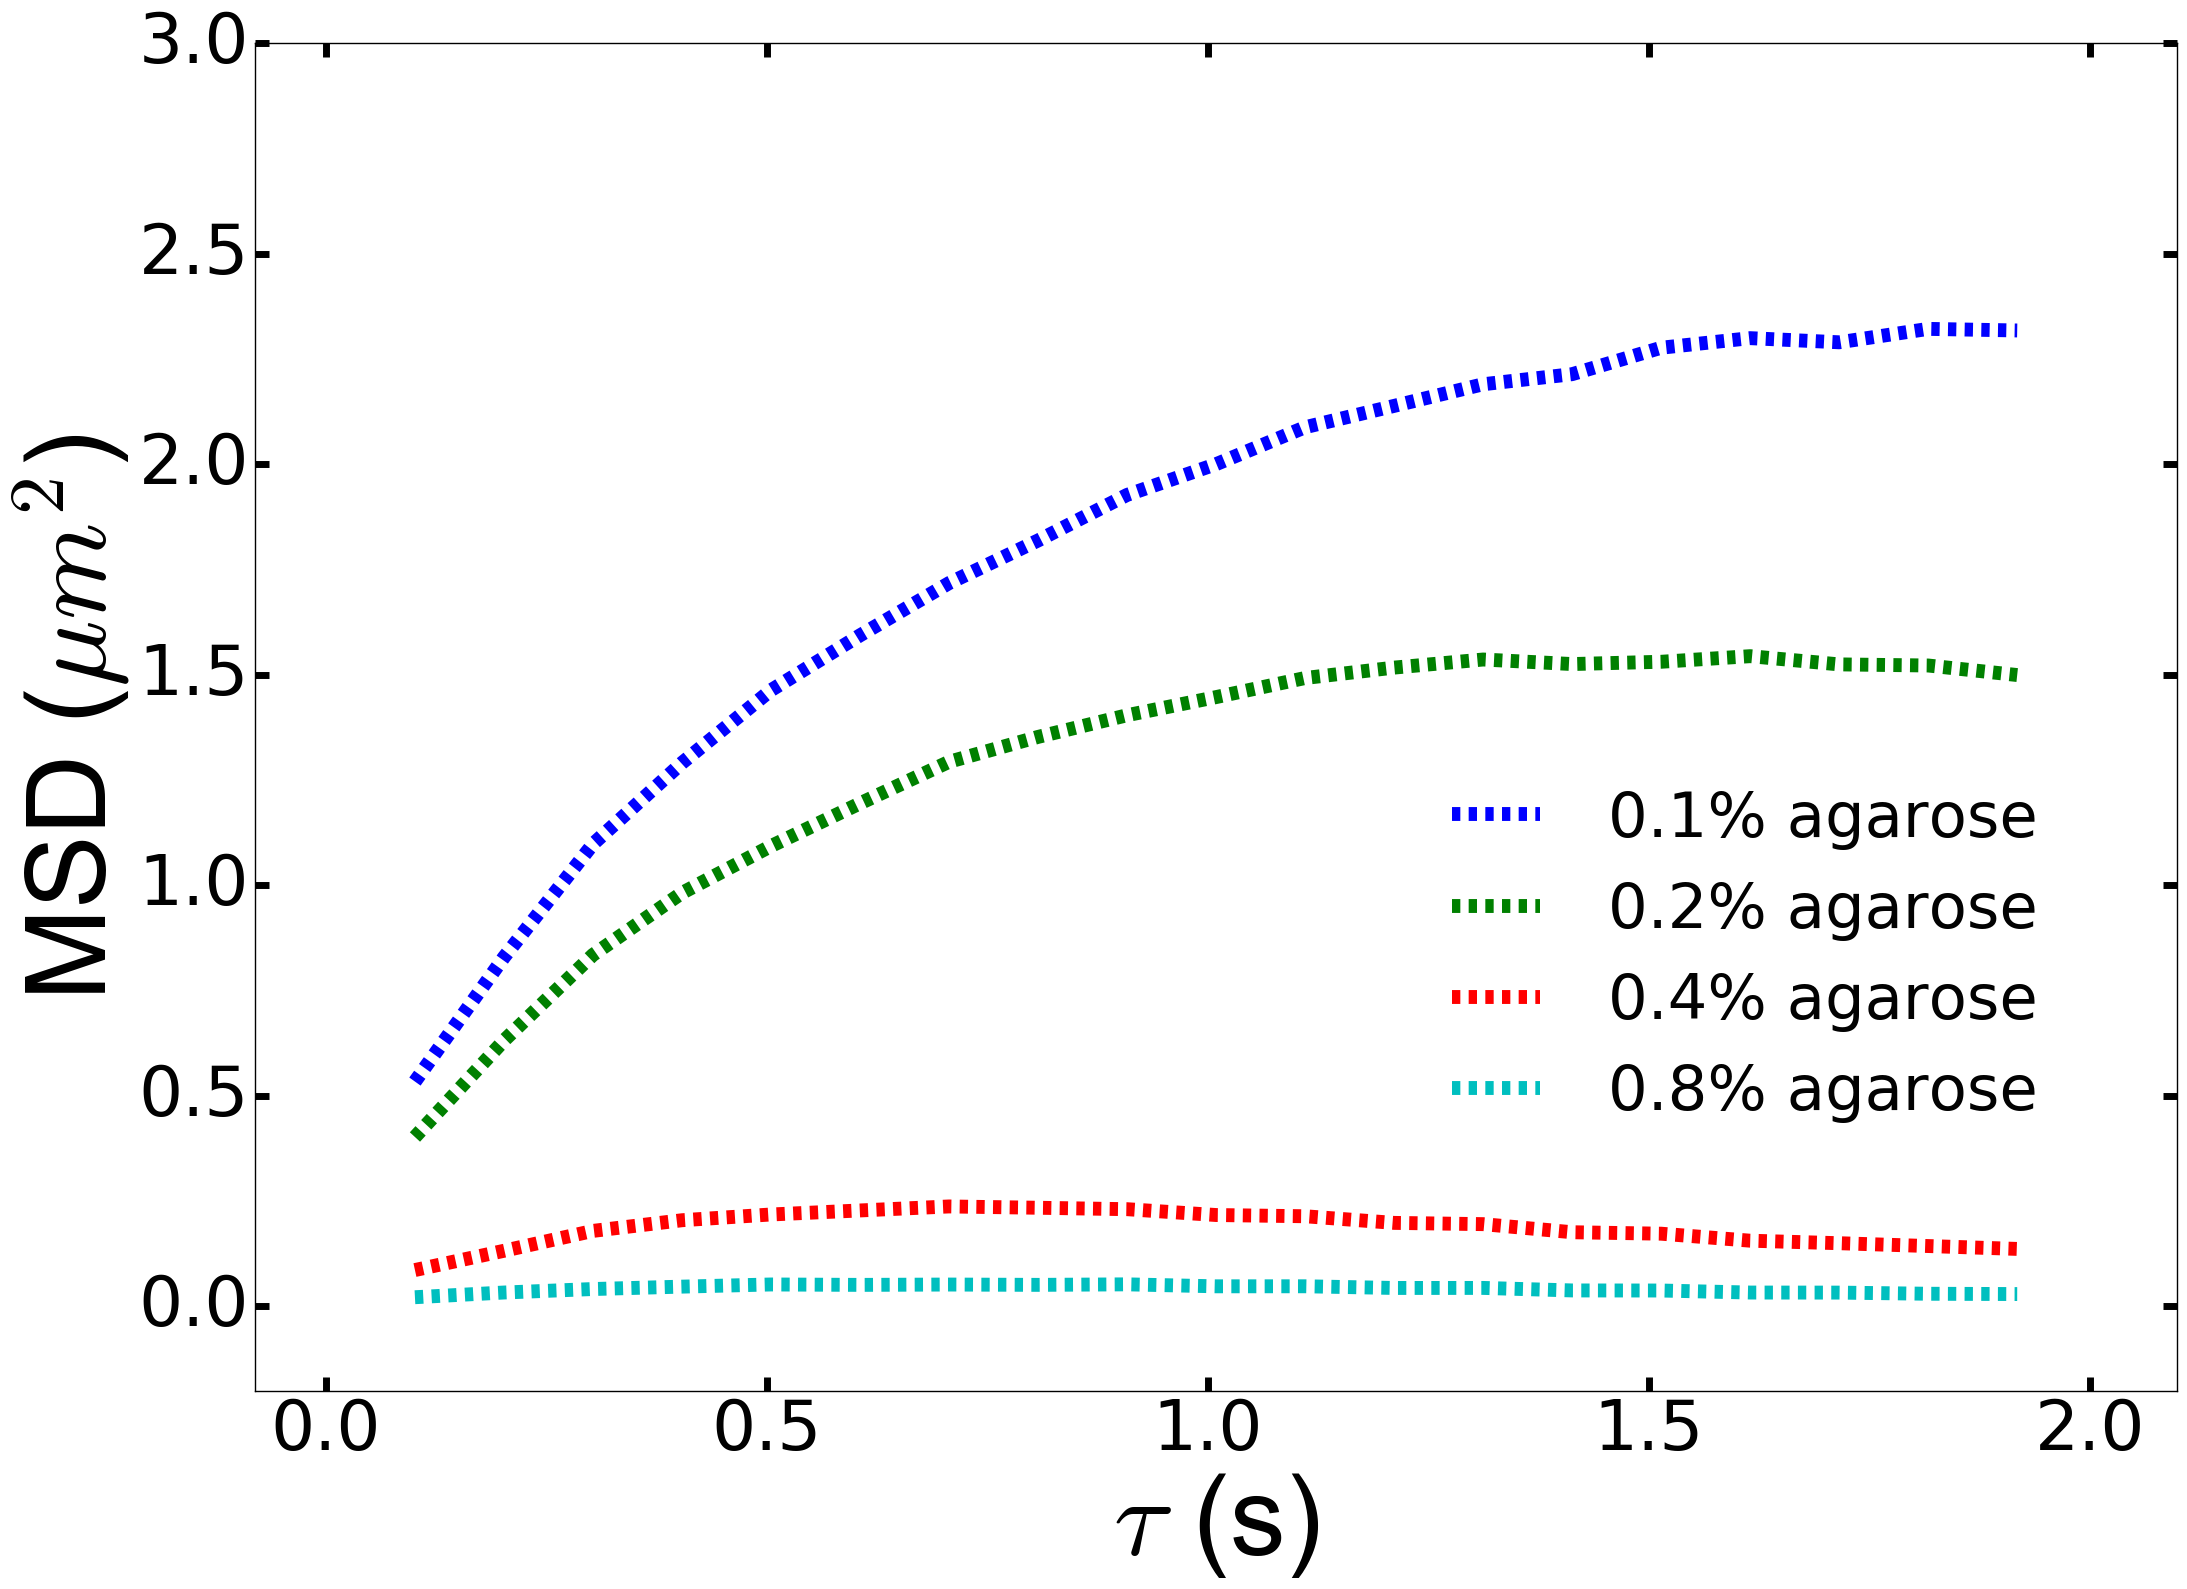

In [30]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[5][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, linestyle = '--', label = '0.1% agarose')
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[6][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, linestyle = '--', label = '0.2% agarose')
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[7][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, linestyle = '--', label = '0.4% agarose')
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_13[8][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, linestyle = '--', label = '0.8% agarose')
ax.legend(loc = (0.6, 0.18),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
plt.ylim((-0.2,3.0))
ax.margins(0.1,0.1)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('PS_PEG_MSDs_varying_agarose_conc_new.png', dpi=fig.dpi)

In [14]:
MSD_dict_10 = dict()

MSD_dict_10[1] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_1/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_10[2] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_3/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_10[3] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_5/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_10[4] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_7/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_10[5] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_2/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_10[6] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_4/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_10[7] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_6/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_10[8] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - cold/well_8/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')

MSD_dict_10[9] = np.zeros(len(MSD_dict_10[1]))
MSD_dict_10[10]=np.zeros(len(MSD_dict_10[1]))
p = 0
while p < len(MSD_dict_10[1]):
    MSD_dict_10[9][p] = np.mean([MSD_dict_10[1][p],MSD_dict_10[2][p],MSD_dict_10[3][p],MSD_dict_10[4][p]])
    MSD_dict_10[10][p] = np.std([MSD_dict_10[1][p],MSD_dict_10[2][p],MSD_dict_10[3][p],MSD_dict_10[4][p]])
    p += 1
    
MSD_dict_10[11] = np.zeros(len(MSD_dict_10[1]))
MSD_dict_10[12]=np.zeros(len(MSD_dict_10[1]))
p = 0
while p < len(MSD_dict_10[5]):
    MSD_dict_10[11][p] = np.mean([MSD_dict_10[5][p],MSD_dict_10[6][p],MSD_dict_10[7][p],MSD_dict_10[8][p]])
    MSD_dict_10[12][p] = np.std([MSD_dict_10[5][p],MSD_dict_10[6][p],MSD_dict_10[7][p],MSD_dict_10[8][p]])
    p += 1

In [15]:
MSD_dict_11 = dict()

MSD_dict_11[1] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_1/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_11[2] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_3/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_11[3] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_5/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_11[4] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_7/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_11[5] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_2/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_11[6] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_4/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_11[7] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_6/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_11[8] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - room temp/well_8/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')

MSD_dict_11[9] = np.zeros(len(MSD_dict_11[1]))
MSD_dict_11[10]=np.zeros(len(MSD_dict_11[1]))
p = 0
while p < len(MSD_dict_11[1]):
    MSD_dict_11[9][p] = np.mean([MSD_dict_11[1][p],MSD_dict_11[2][p],MSD_dict_11[3][p],MSD_dict_11[4][p]])
    MSD_dict_11[10][p] = np.std([MSD_dict_11[1][p],MSD_dict_11[2][p],MSD_dict_11[3][p],MSD_dict_11[4][p]])
    p += 1
    
MSD_dict_11[11] = np.zeros(len(MSD_dict_11[1]))
MSD_dict_11[12]=np.zeros(len(MSD_dict_11[1]))
p = 0
while p < len(MSD_dict_11[5]):
    MSD_dict_11[11][p] = np.mean([MSD_dict_11[5][p],MSD_dict_11[6][p],MSD_dict_11[7][p],MSD_dict_11[8][p]])
    MSD_dict_11[12][p] = np.std([MSD_dict_11[5][p],MSD_dict_11[6][p],MSD_dict_11[7][p],MSD_dict_11[8][p]])
    p += 1

In [16]:
MSD_dict_12 = dict()

MSD_dict_12[1] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_1/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_12[2] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_3/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_12[3] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_5/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_12[4] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_7/geoM2xy_PS_COOH_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_12[5] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_2/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_12[6] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_4/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_12[7] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_6/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')
MSD_dict_12[8] = np.genfromtxt('./Data_Files_Mike/9_15_17 - MPT cooling rate effects - incubator/well_8/geoM2xy_PS_PEG_in_0_4_agarose_gel_vid_1.csv', delimiter = ',')

MSD_dict_12[9] = np.zeros(len(MSD_dict_12[1]))
MSD_dict_12[10]=np.zeros(len(MSD_dict_12[1]))
p = 0
while p < len(MSD_dict_12[1]):
    MSD_dict_12[9][p] = np.mean([MSD_dict_12[1][p],MSD_dict_12[2][p],MSD_dict_12[3][p],MSD_dict_12[4][p]])
    MSD_dict_12[10][p] = np.std([MSD_dict_12[1][p],MSD_dict_12[2][p],MSD_dict_12[3][p],MSD_dict_12[4][p]])
    p += 1
    
MSD_dict_12[11] = np.zeros(len(MSD_dict_12[1]))
MSD_dict_12[12]=np.zeros(len(MSD_dict_12[1]))
p = 0
while p < len(MSD_dict_12[5]):
    MSD_dict_12[11][p] = np.mean([MSD_dict_12[5][p],MSD_dict_12[6][p],MSD_dict_12[7][p],MSD_dict_12[8][p]])
    MSD_dict_12[12][p] = np.std([MSD_dict_12[5][p],MSD_dict_12[6][p],MSD_dict_12[7][p],MSD_dict_12[8][p]])
    p += 1

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


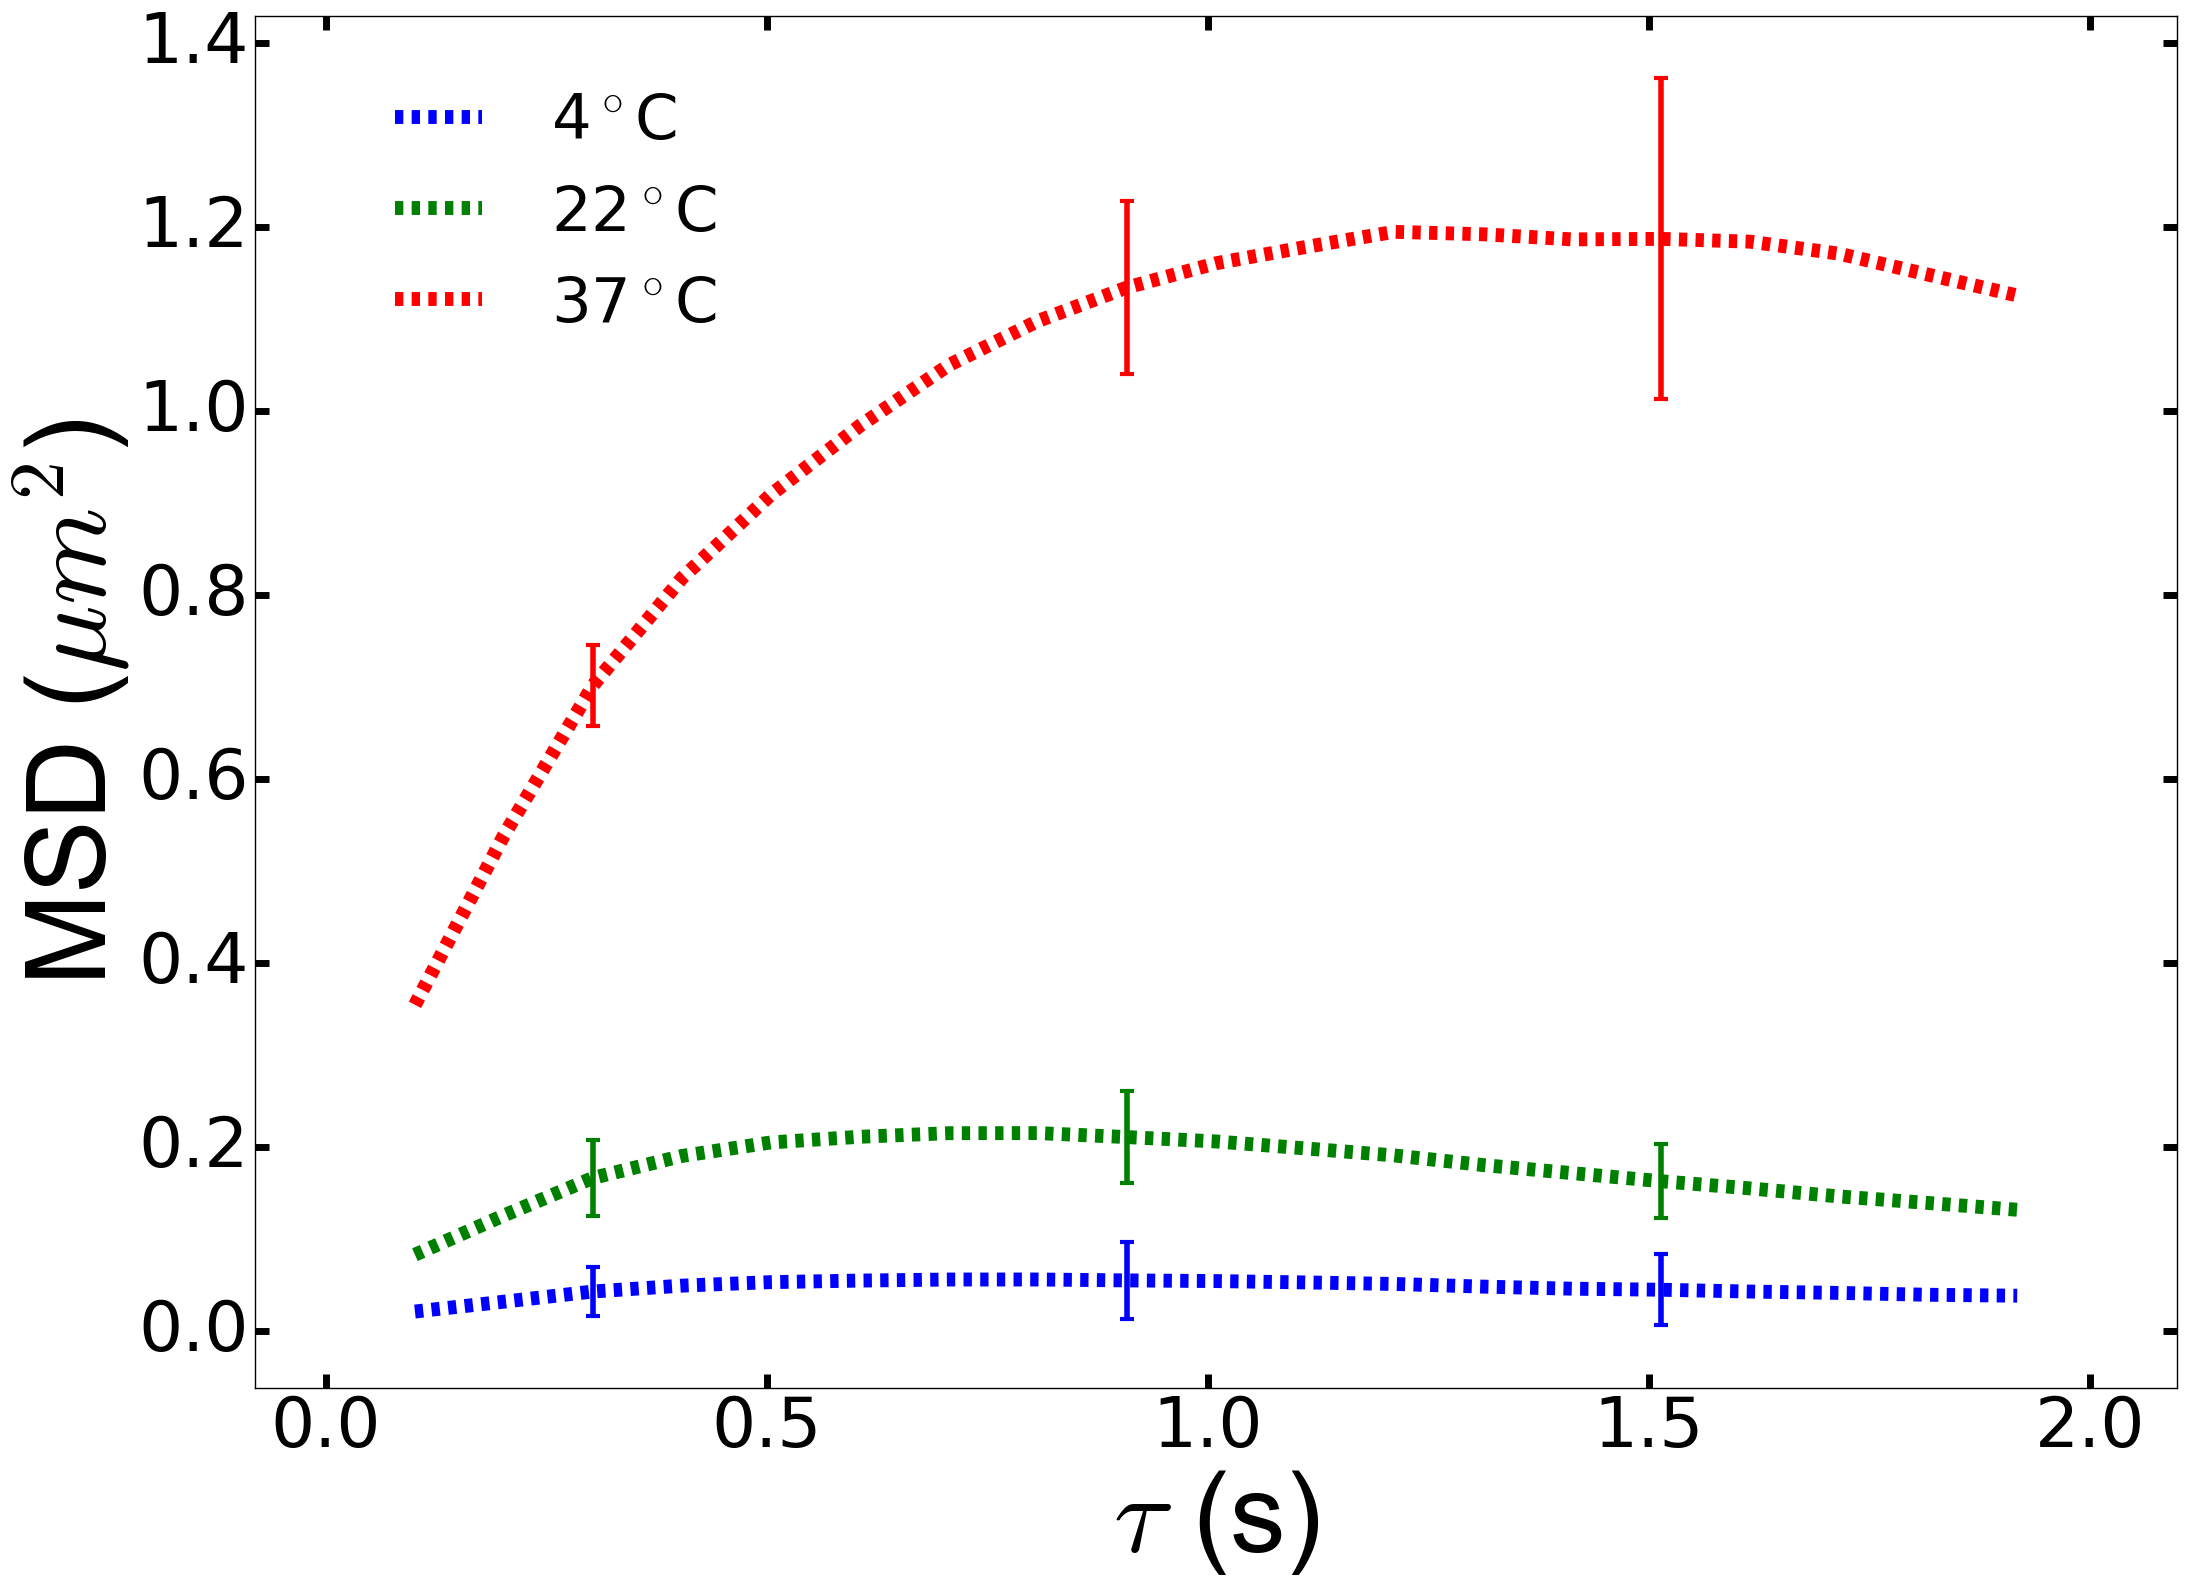

In [17]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_10[11][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, linestyle = '--', color = 'blue', label = '4$^\circ$C')
ax.errorbar(time_dict_8[1][3],MSD_dict_10[11][3], yerr = MSD_dict_10[12][3], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][9],MSD_dict_10[11][9], yerr = MSD_dict_10[12][9], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][15],MSD_dict_10[11][15], yerr = MSD_dict_10[12][15], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_11[11][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, linestyle = '--', color = 'green', label = '22$^\circ$C')
ax.errorbar(time_dict_8[1][3],MSD_dict_11[11][3], yerr = MSD_dict_11[12][3], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][9],MSD_dict_11[11][9], yerr = MSD_dict_11[12][9], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][15],MSD_dict_11[11][15], yerr = MSD_dict_11[12][15], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_12[11][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, linestyle = '--', color = 'red', label = '37$^\circ$C')
ax.errorbar(time_dict_8[1][3],MSD_dict_12[11][3], yerr = MSD_dict_12[12][3], ecolor = 'red', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][9],MSD_dict_12[11][9], yerr = MSD_dict_12[12][9], ecolor = 'red', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][15],MSD_dict_12[11][15], yerr = MSD_dict_12[12][15], ecolor = 'red', elinewidth = 4, capsize = 5, capthick = 3)
ax.legend(loc = (0.05, 0.75),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.margins(0.1,0.05)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('PS_PEG_effect_of_cooling_rate_with_error_bars.png', dpi=fig.dpi)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


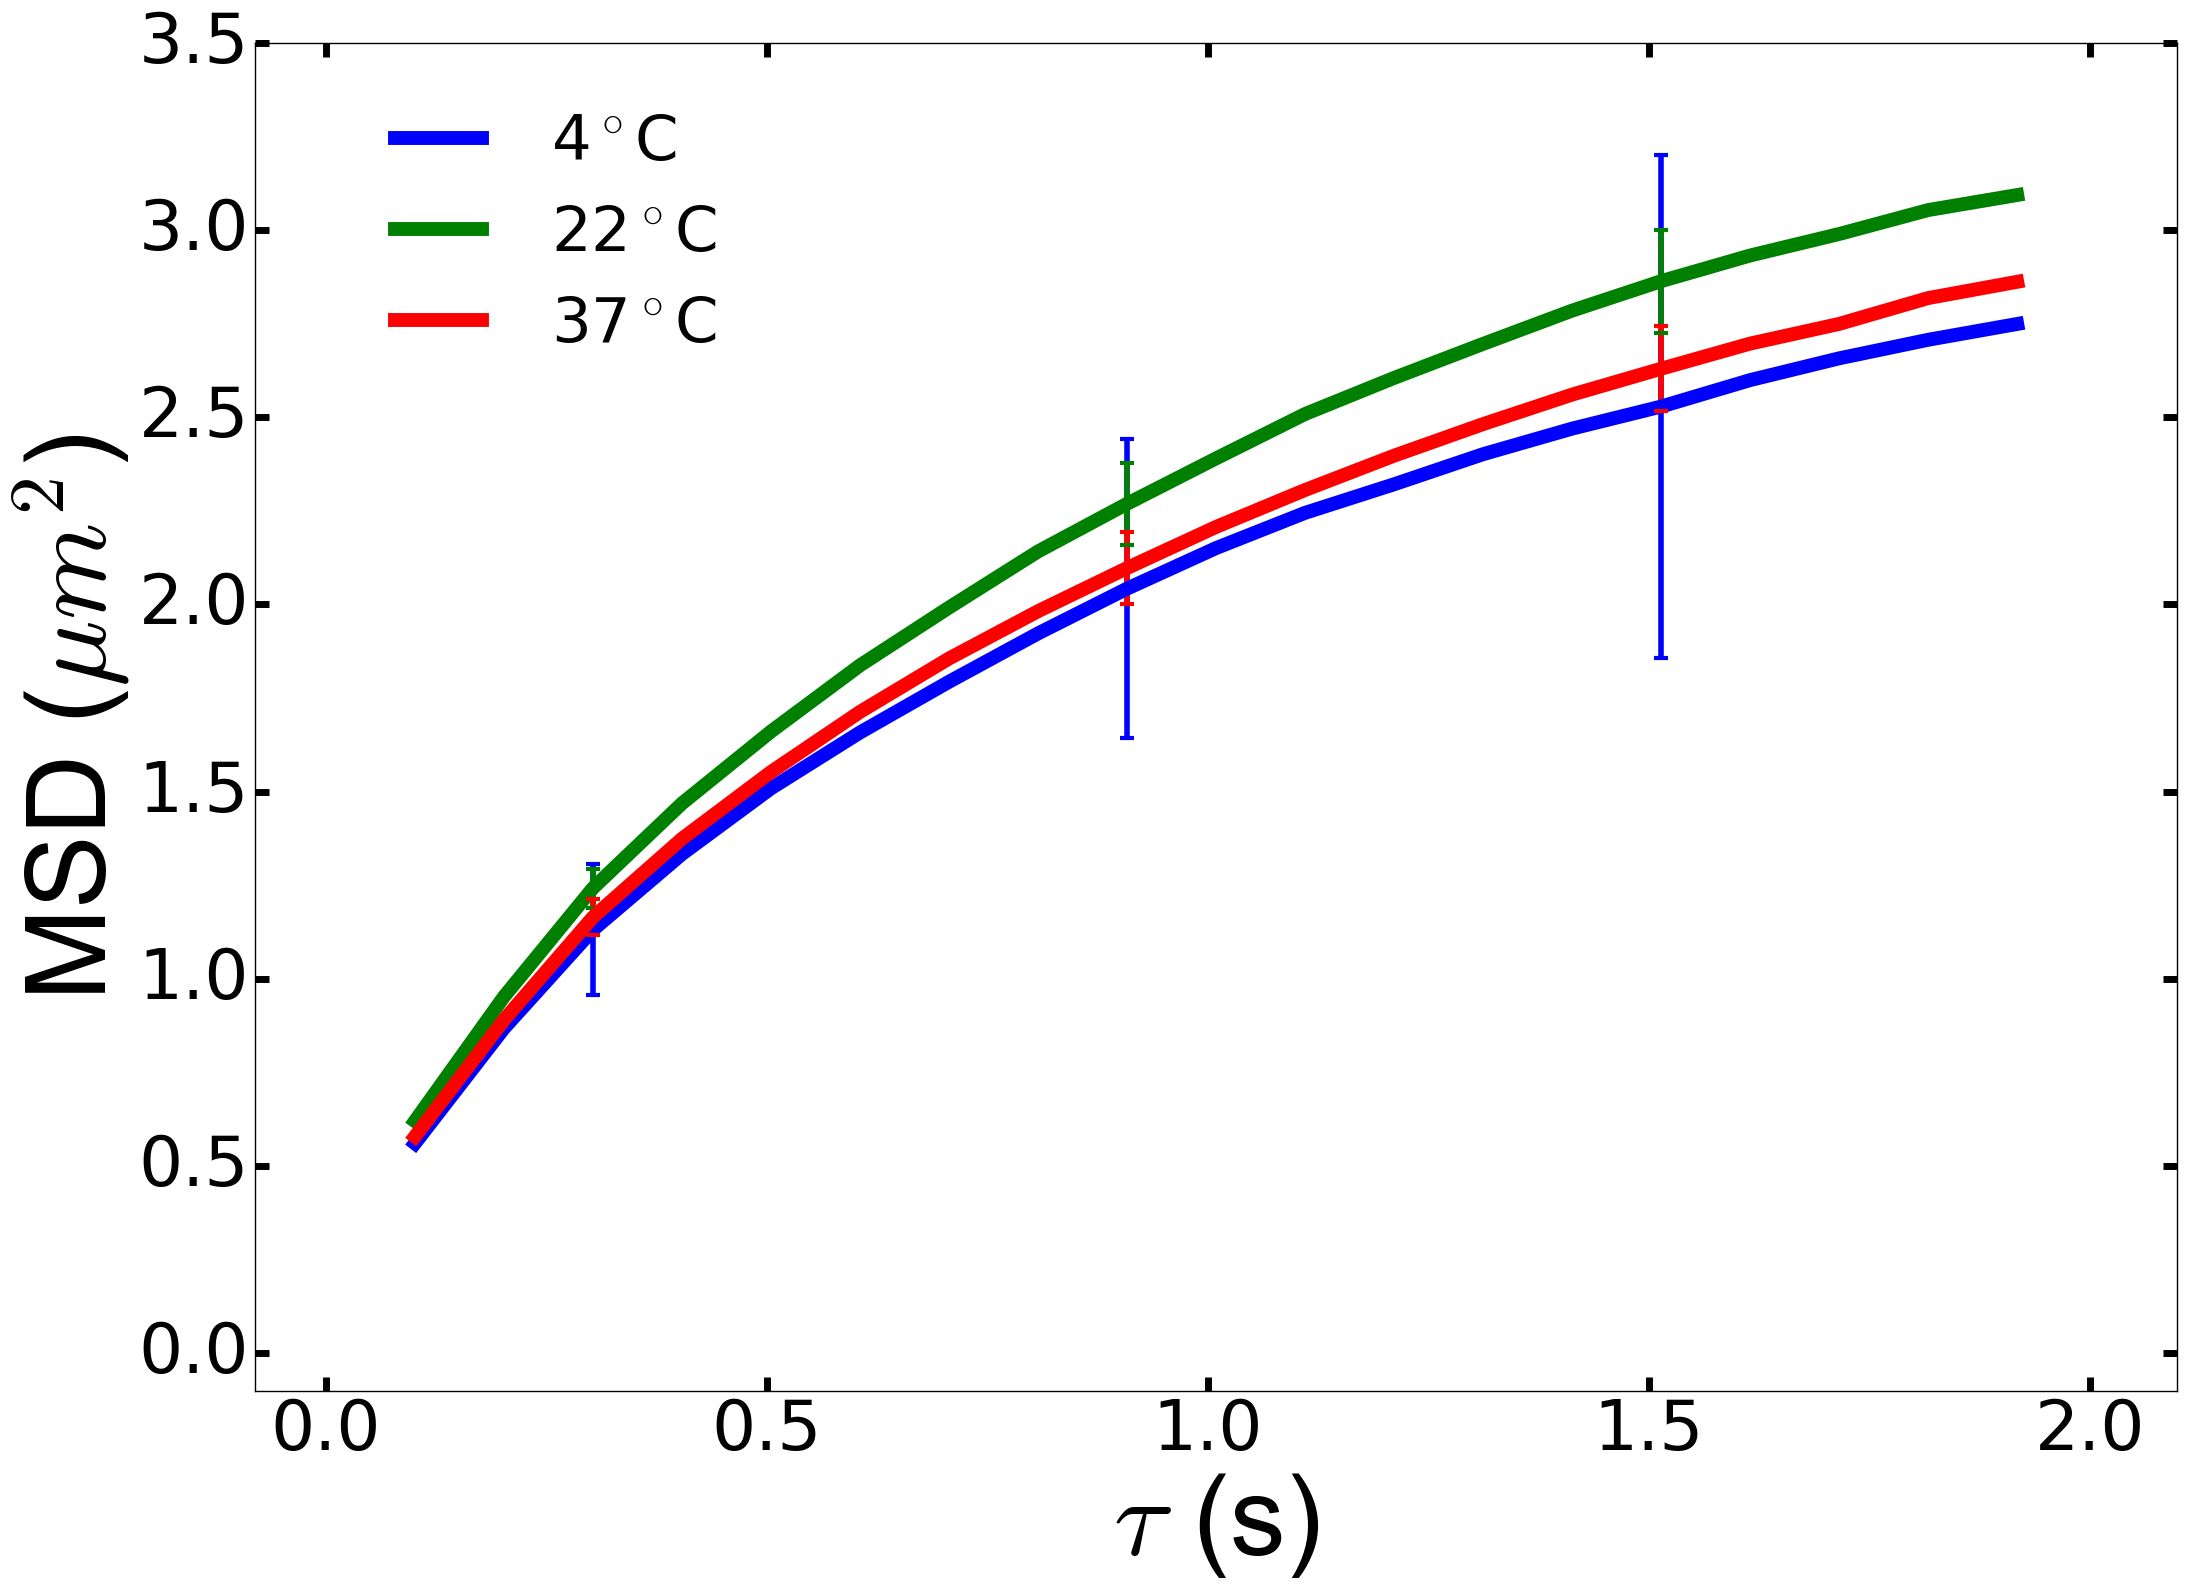

In [18]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_10[9][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, color = 'blue', label = '4$^\circ$C')
ax.errorbar(time_dict_8[1][3],MSD_dict_10[9][3], yerr = MSD_dict_10[10][3], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][9],MSD_dict_10[9][9], yerr = MSD_dict_10[10][9], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][15],MSD_dict_10[9][15], yerr = MSD_dict_10[10][15], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_11[9][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, color = 'green', label = '22$^\circ$C')
ax.errorbar(time_dict_8[1][3],MSD_dict_11[9][3], yerr = MSD_dict_11[10][3], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][9],MSD_dict_11[9][9], yerr = MSD_dict_11[10][9], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][15],MSD_dict_11[9][15], yerr = MSD_dict_11[10][15], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_8[1][1:(np.ceil(2*fps_vals_8[0]))], MSD_dict_12[9][1:(np.ceil(2*fps_vals_8[0]))], linewidth=10, color = 'red', label = '37$^\circ$C')
ax.errorbar(time_dict_8[1][3],MSD_dict_12[9][3], yerr = MSD_dict_12[10][3], ecolor = 'red', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][9],MSD_dict_12[9][9], yerr = MSD_dict_12[10][9], ecolor = 'red', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][15],MSD_dict_12[9][15], yerr = MSD_dict_12[10][15], ecolor = 'red', elinewidth = 4, capsize = 5, capthick = 3)
ax.legend(loc = (0.05, 0.75),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.set_ylim(bottom=-0.1)
ax.margins(0.1,0.15)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('PS_COOH_effect_of_cooling_rate_with_error_bars.png', dpi=fig.dpi)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main_

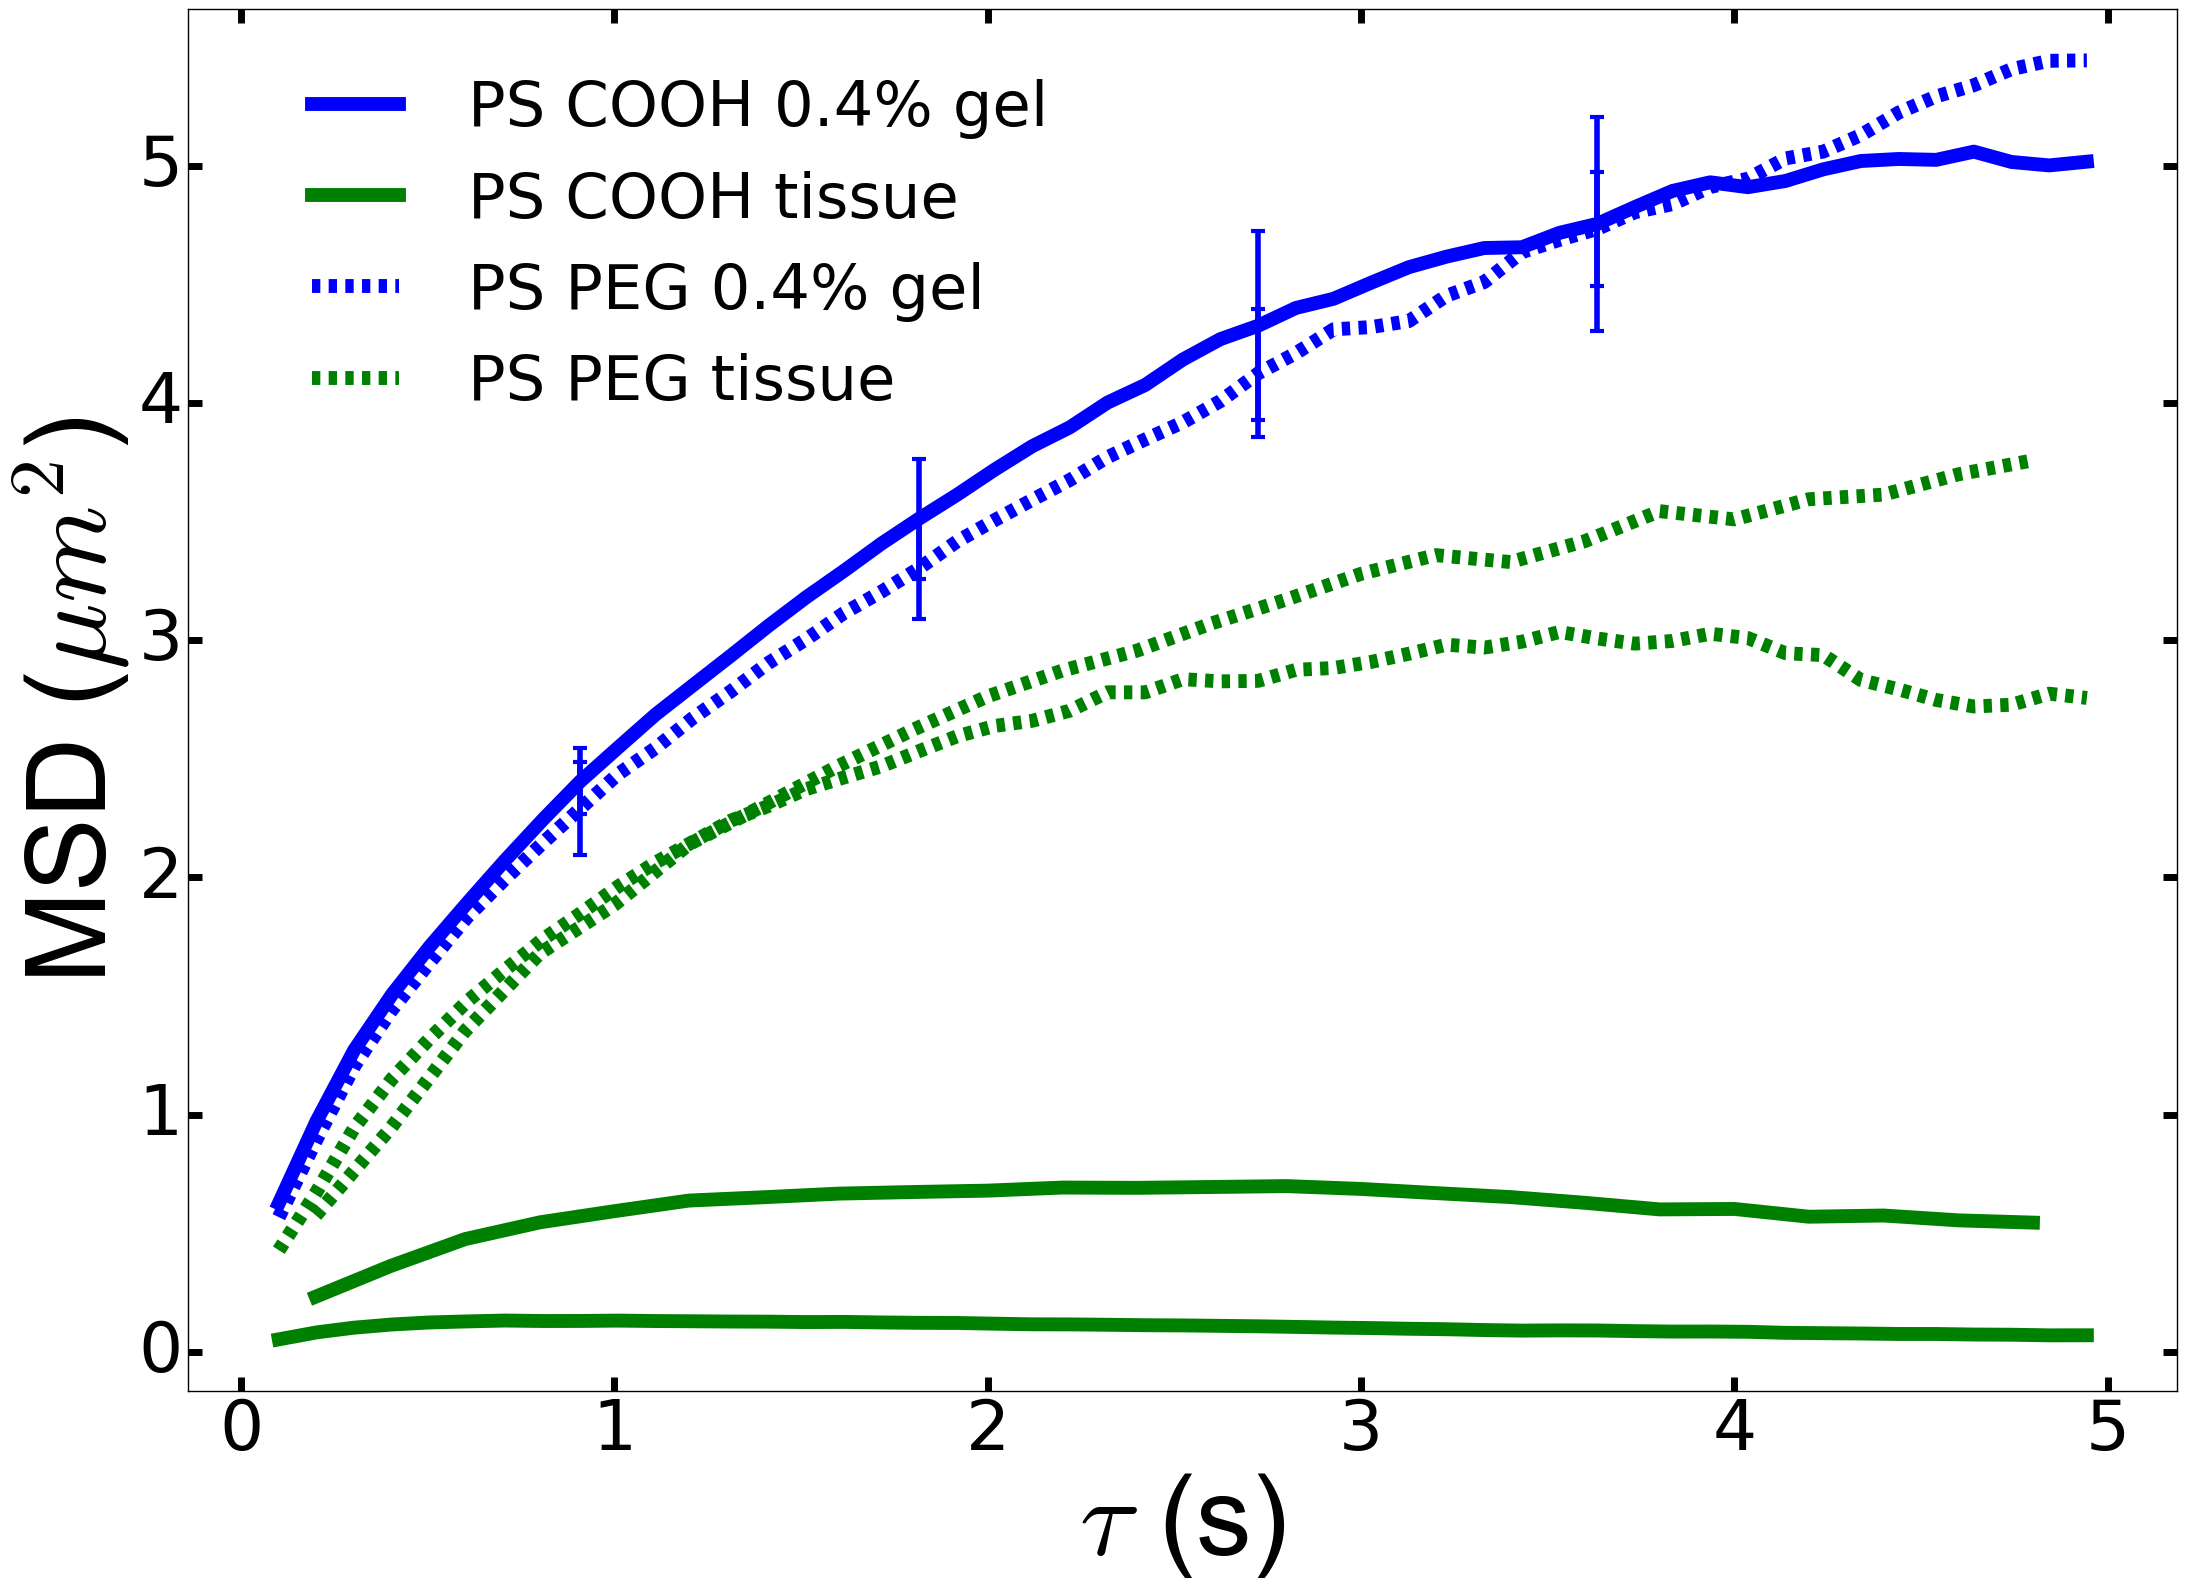

In [19]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_4[17][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color='blue', label = 'PS COOH 0.4% gel')
ax.errorbar(time_dict_8[1][9],MSD_dict_4[17][9], yerr = MSD_dict_4[18][9], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_4[17][18], yerr = MSD_dict_4[18][18], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_4[17][27], yerr = MSD_dict_4[18][27], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_4[17][36], yerr = MSD_dict_4[18][36], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_7[1][1:(np.ceil(5*fps_vals_7[0]))], MSD_dict_7[1][1:(np.ceil(5*fps_vals_7[0]))], linewidth=10, color = 'green', label = 'PS COOH tissue')
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_6[9][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, linestyle = '--', color = 'blue', label = 'PS PEG 0.4% gel')
ax.errorbar(time_dict_8[1][9],MSD_dict_6[9][9], yerr = MSD_dict_6[10][9], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_6[9][18], yerr = MSD_dict_6[10][18], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_6[9][27], yerr = MSD_dict_6[10][27], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_6[9][36], yerr = MSD_dict_6[10][36], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_7[2][1:(np.ceil(5*fps_vals_7[1]))], MSD_dict_7[2][1:(np.ceil(5*fps_vals_7[1]))], linewidth=10, linestyle = '--', color = 'green', label = 'PS PEG tissue')
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_9[1][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color = 'green')
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_9[2][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color = 'green', linestyle = '--')
ax.legend(loc = (0.04, 0.69),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.margins(0.05,0.04)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('MPT_brain_tissue_vs_gel.png', dpi=fig.dpi)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


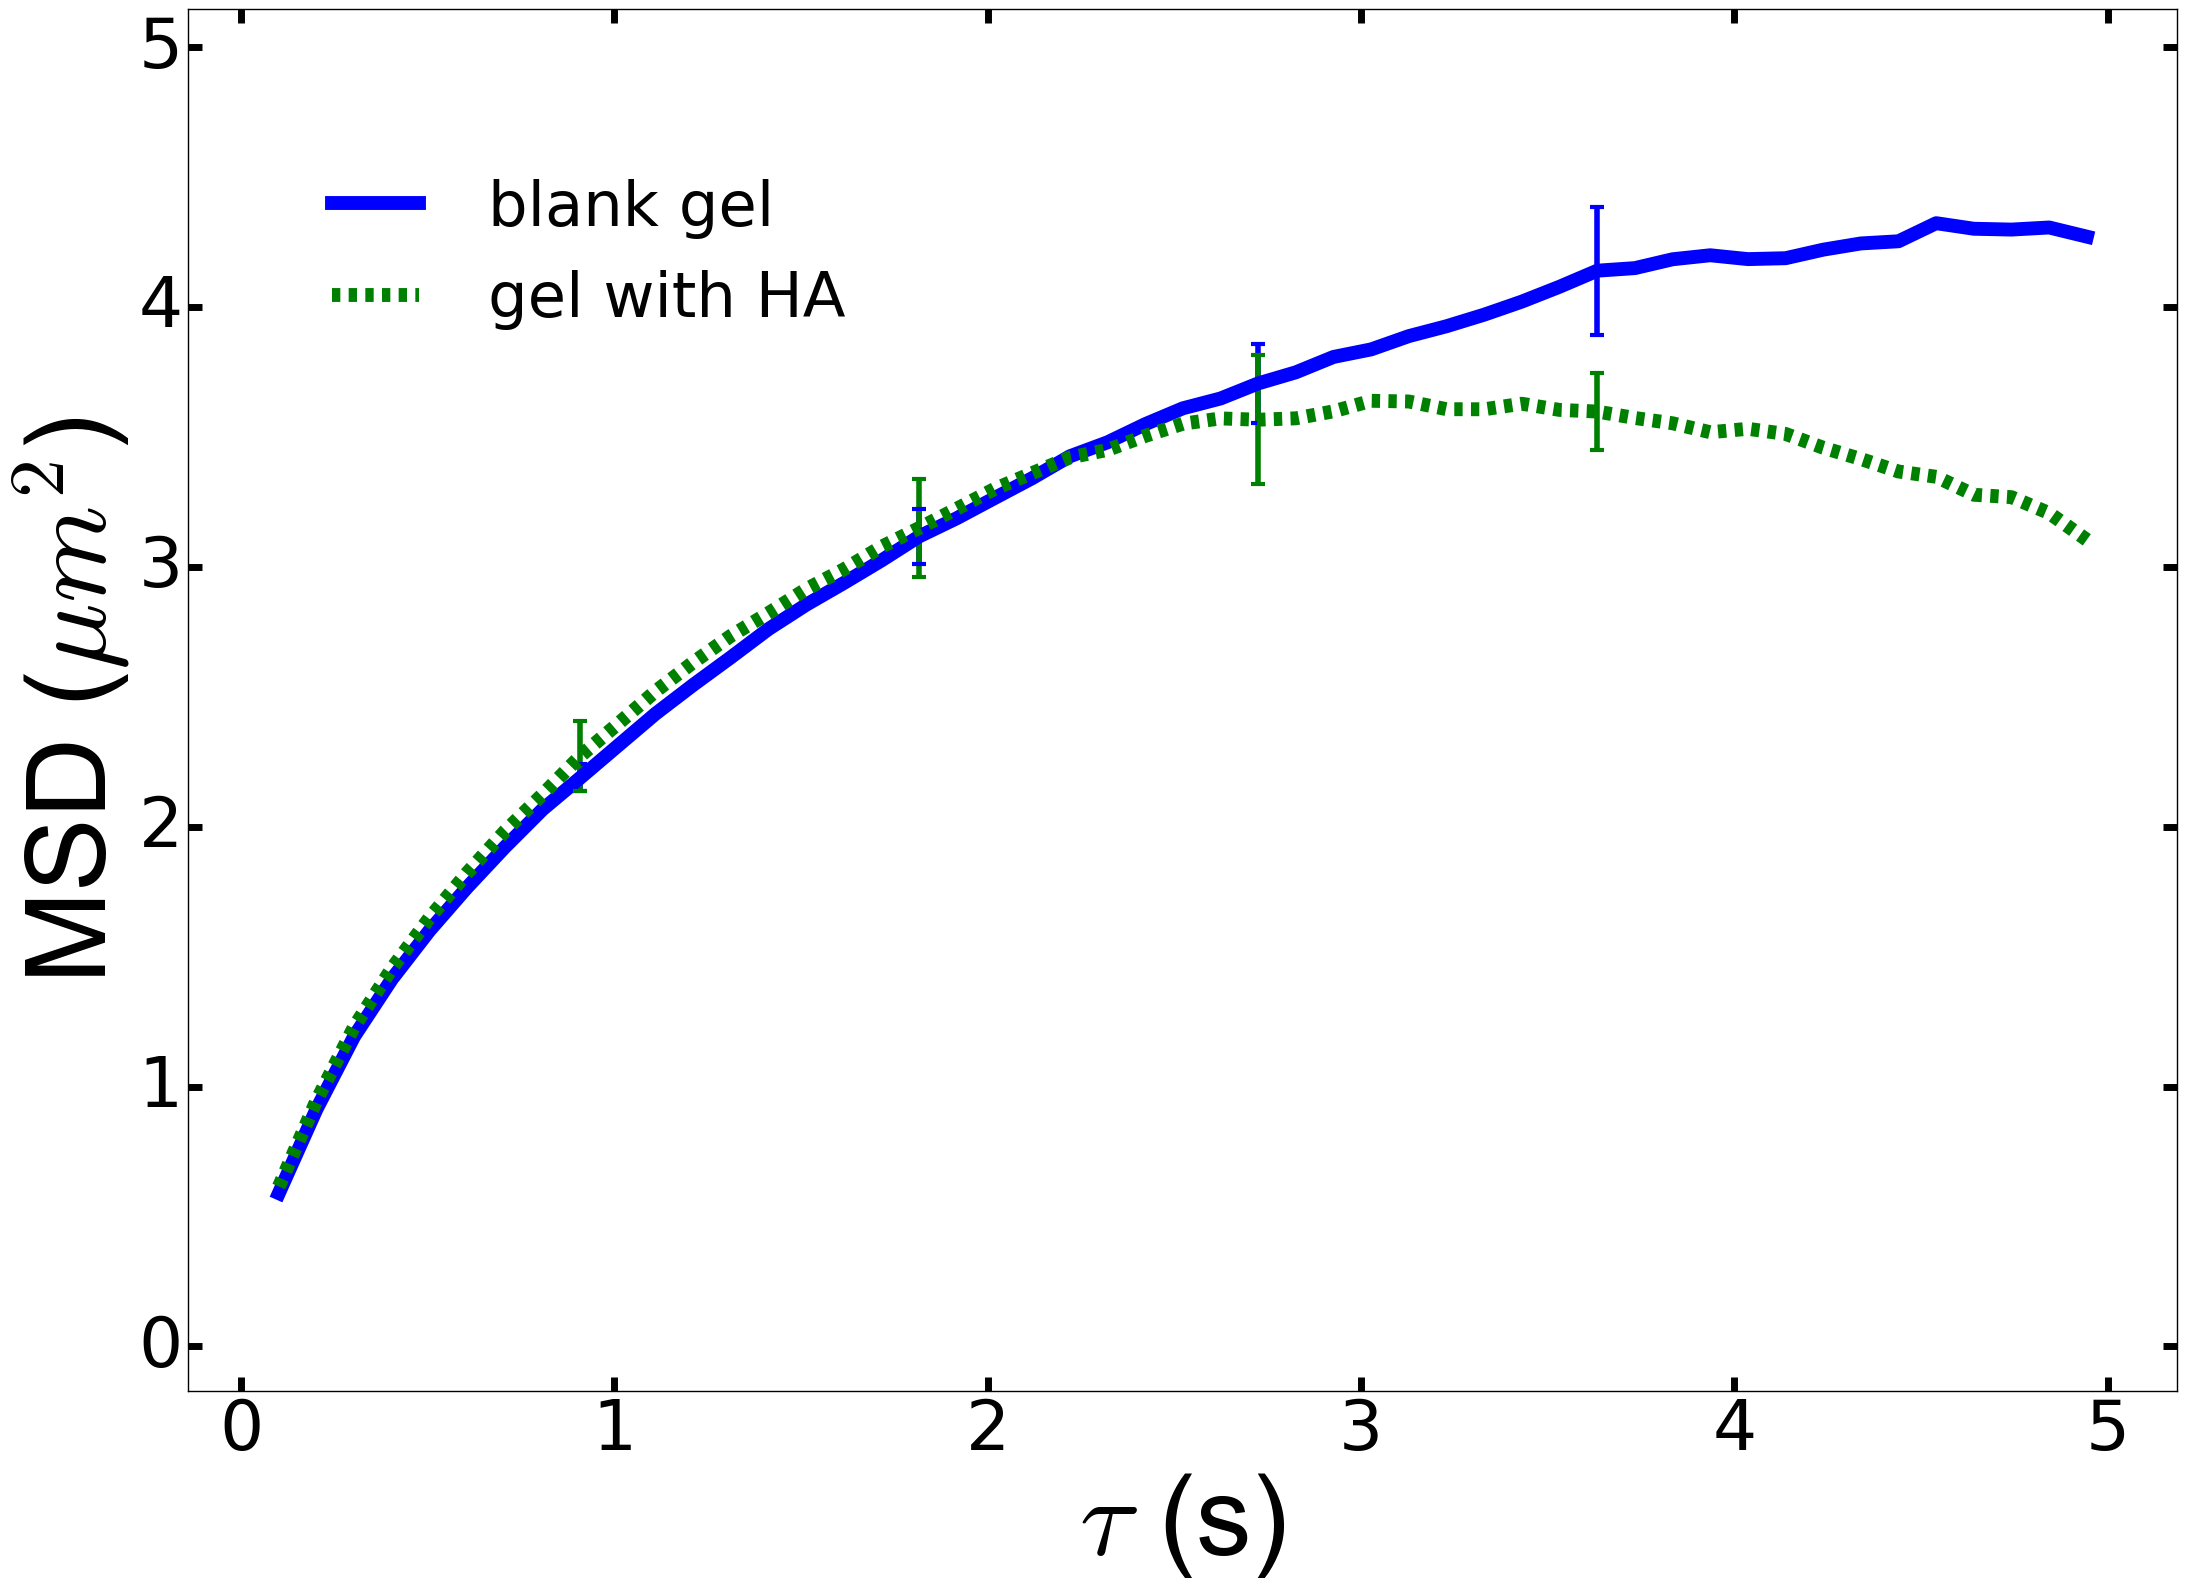

In [20]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_6[11][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color = 'blue', label = 'blank gel')
ax.errorbar(time_dict_8[1][9],MSD_dict_6[11][9], yerr = MSD_dict_6[12][9], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_6[11][18], yerr = MSD_dict_6[12][18], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_6[11][27], yerr = MSD_dict_6[12][27], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_6[11][36], yerr = MSD_dict_6[12][36], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_8[5][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_6[13][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color = 'green', linestyle = '--', label = 'gel with HA')
ax.errorbar(time_dict_8[1][9],MSD_dict_6[13][9], yerr = MSD_dict_6[14][9], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_6[13][18], yerr = MSD_dict_6[14][18], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_6[13][27], yerr = MSD_dict_6[14][27], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_6[13][36], yerr = MSD_dict_6[14][36], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.legend(loc = (0.05, 0.75),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.margins(0.05,0.2)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('PS_COOH_HA_effect.png', dpi=fig.dpi)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


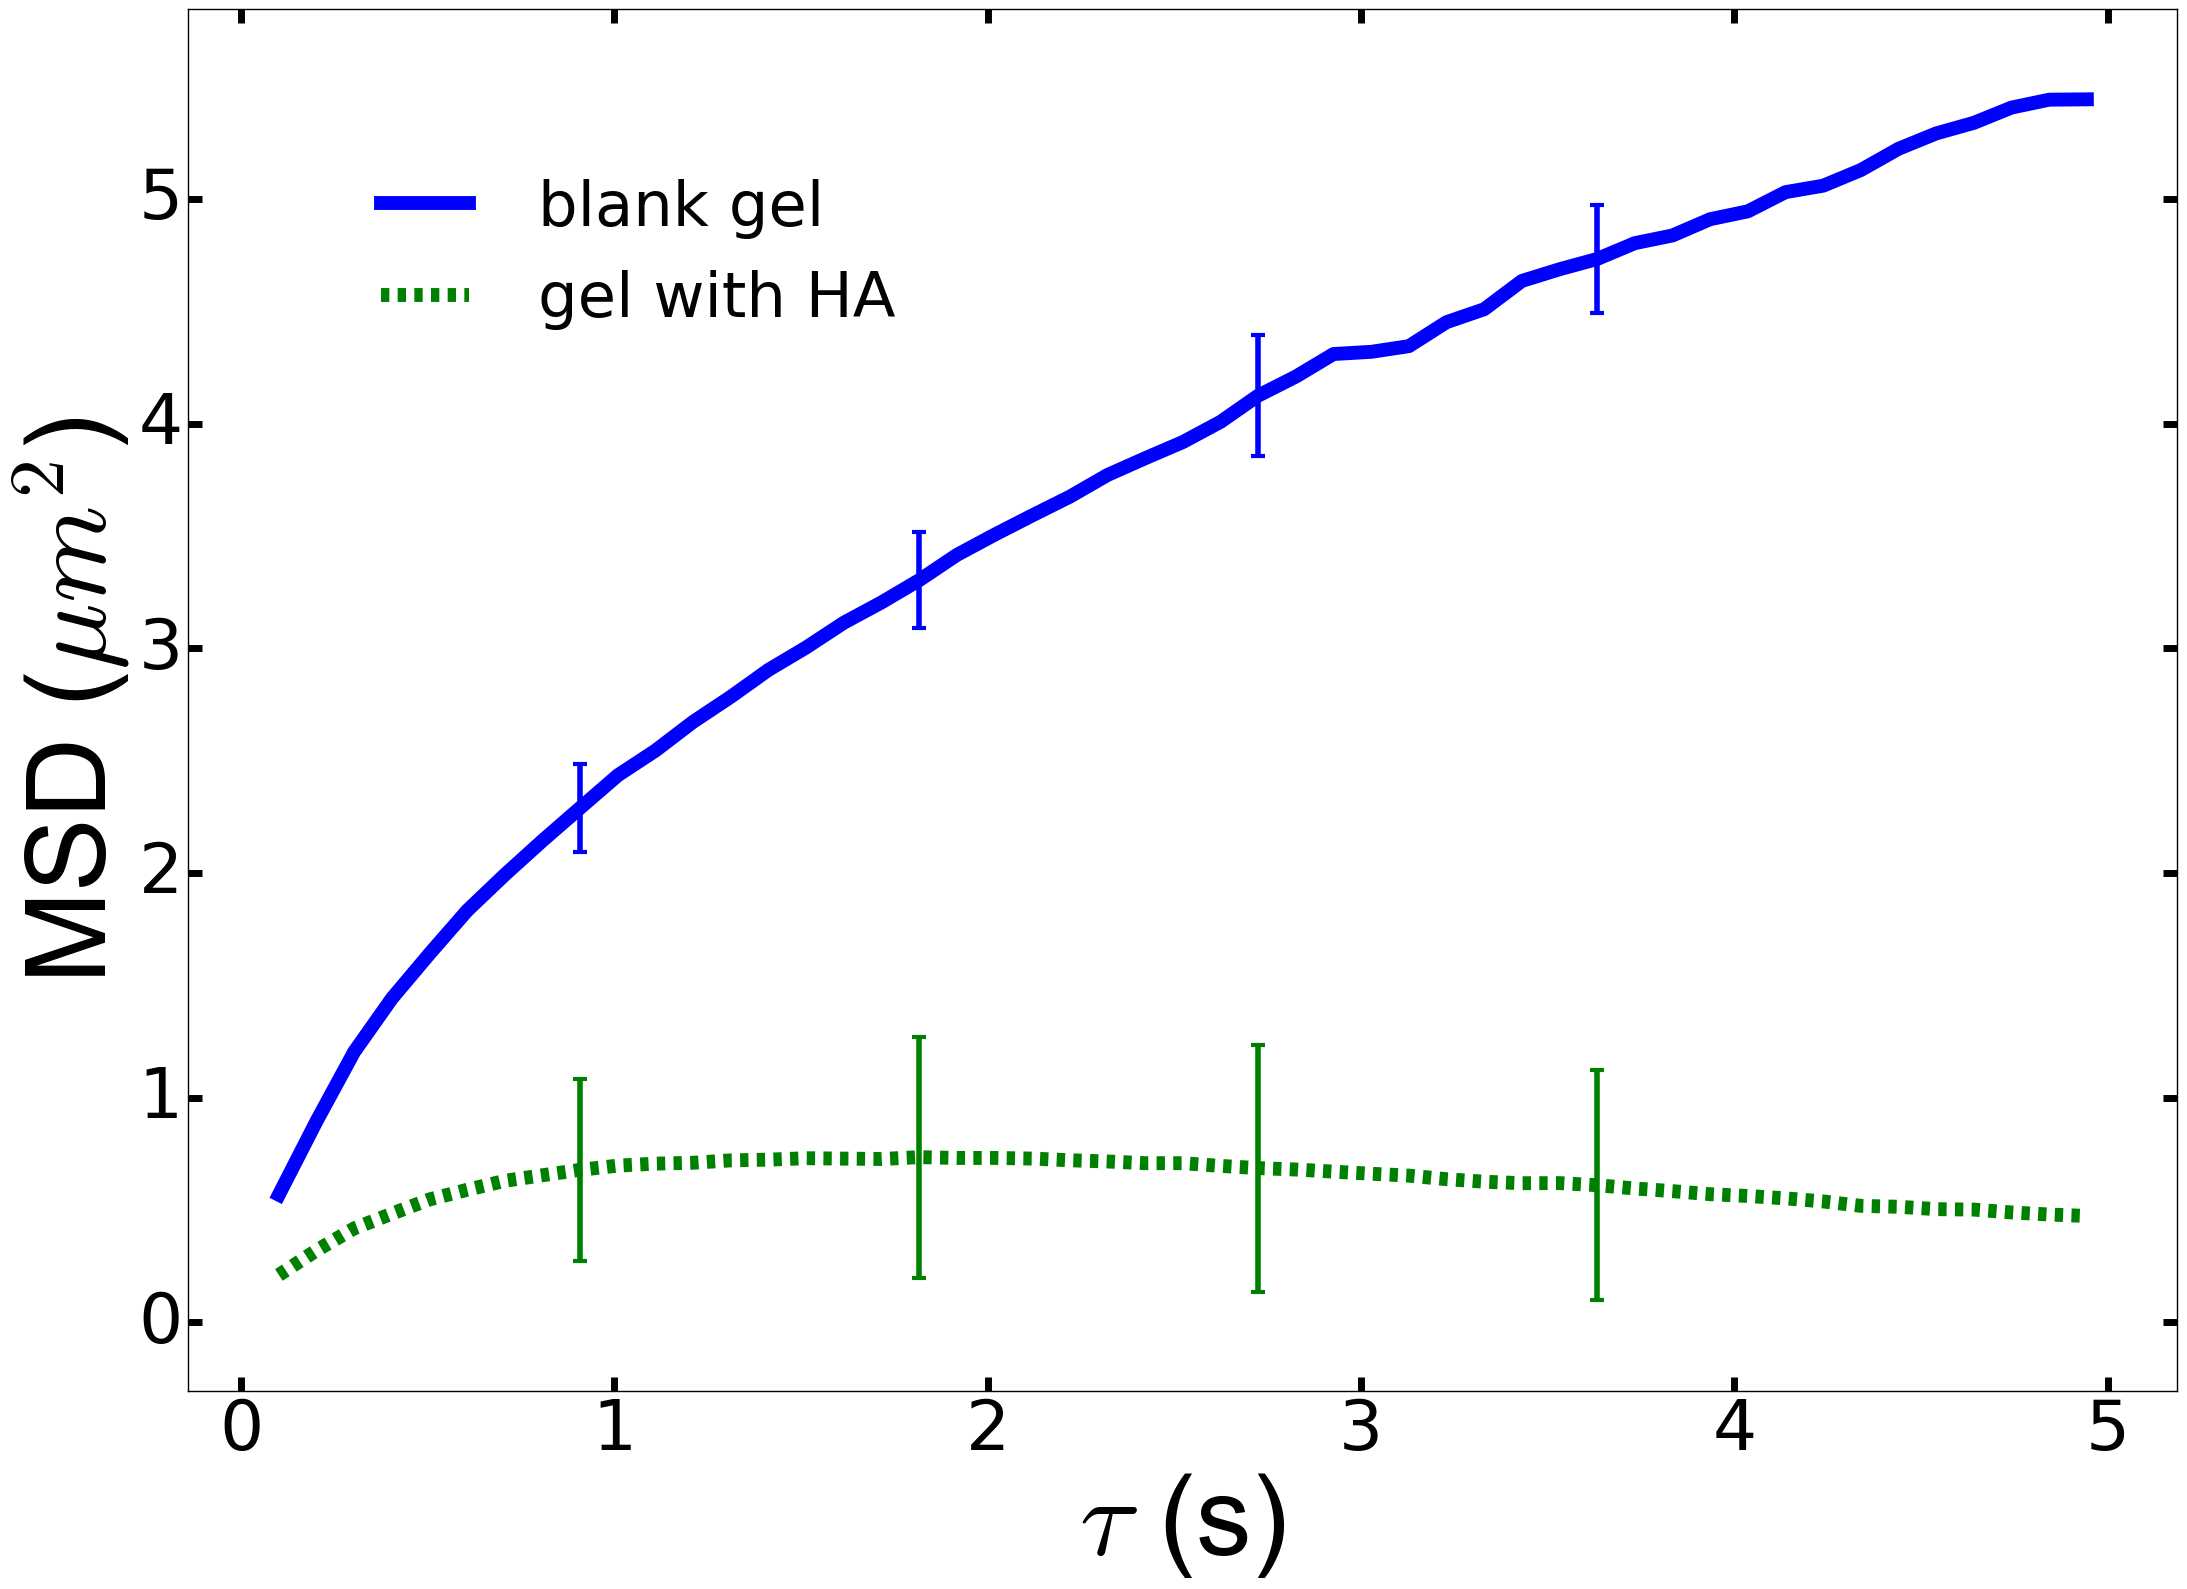

In [21]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_6[9][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color = 'blue', label = 'blank gel')
ax.errorbar(time_dict_8[1][9],MSD_dict_6[9][9], yerr = MSD_dict_6[10][9], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_6[9][18], yerr = MSD_dict_6[10][18], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_6[9][27], yerr = MSD_dict_6[10][27], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_6[9][36], yerr = MSD_dict_6[10][36], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_8[5][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_6[15][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color = 'green', linestyle = '--', label = 'gel with HA')
ax.errorbar(time_dict_8[1][9],MSD_dict_6[15][9], yerr = MSD_dict_6[16][9], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_6[15][18], yerr = MSD_dict_6[16][18], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_6[15][27], yerr = MSD_dict_6[16][27], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_6[15][36], yerr = MSD_dict_6[16][36], ecolor = 'green', elinewidth = 4, capsize = 5, capthick = 3)
ax.legend(loc = (0.075, 0.75),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.margins(0.05,0.075)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('PS_PEG_HA_effect.png', dpi=fig.dpi)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


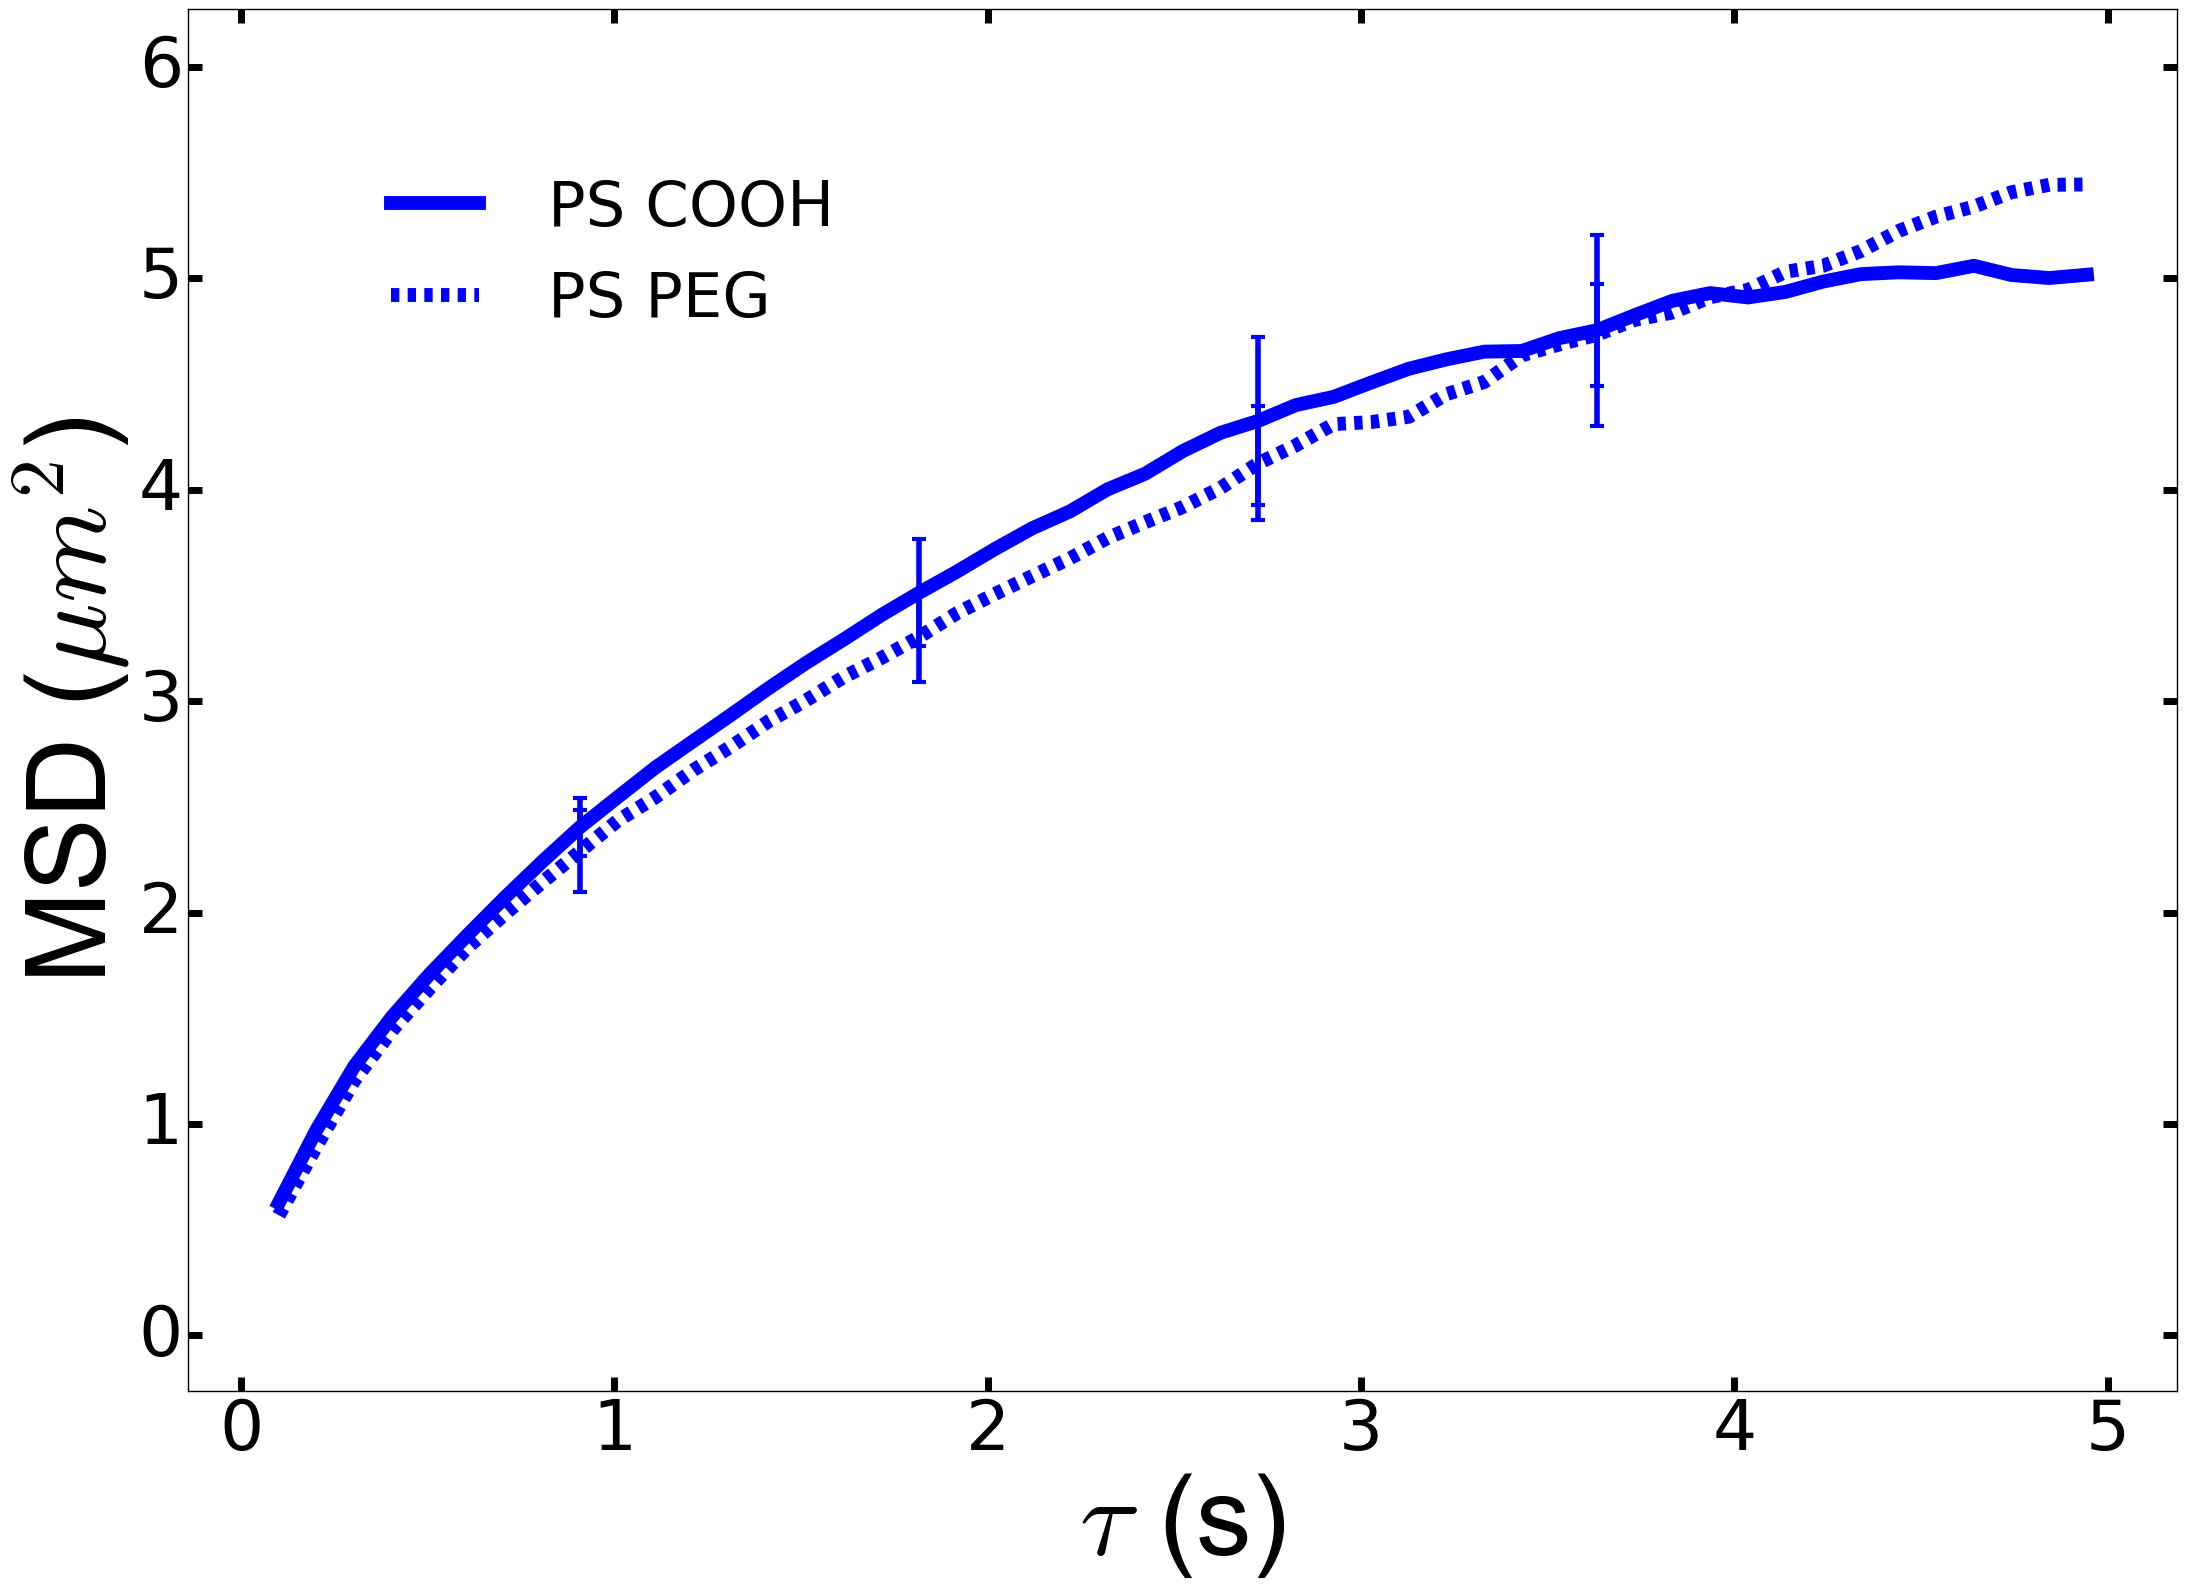

In [22]:
hfont = {'fontname':'Arial'}
fig = plt.figure(1,figsize=(22, 16), dpi=80)
ax = fig.add_subplot(111)
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_4[17][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, color='blue', label = 'PS COOH')
ax.errorbar(time_dict_8[1][9],MSD_dict_4[17][9], yerr = MSD_dict_4[18][9], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_4[17][18], yerr = MSD_dict_4[18][18], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_4[17][27], yerr = MSD_dict_4[18][27], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_4[17][36], yerr = MSD_dict_4[18][36], ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.plot(time_dict_8[1][1:(np.ceil(5*fps_vals_8[0]))], MSD_dict_6[9][1:(np.ceil(5*fps_vals_8[0]))], linewidth=10, linestyle = '--', color = 'blue', label = 'PS PEG')
ax.errorbar(time_dict_8[1][9],MSD_dict_6[9][9], yerr = MSD_dict_6[10][9], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][18],MSD_dict_6[9][18], yerr = MSD_dict_6[10][18], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][27],MSD_dict_6[9][27], yerr = MSD_dict_6[10][27], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.errorbar(time_dict_8[1][36],MSD_dict_6[9][36], yerr = MSD_dict_6[10][36], linestyle = '--', ecolor = 'blue', elinewidth = 4, capsize = 5, capthick = 3)
ax.legend(loc = (0.08, 0.75),frameon=False,fontsize=45)
ax.tick_params(axis='both', which='major', labelsize=50)
ax.margins(0.05,0.17)
ax.xaxis.set_tick_params(width = 5, length = 10)
ax.yaxis.set_tick_params(width = 5, length = 10)
plt.xlabel(r'$\tau$ (s)', fontsize = 80, **hfont)
plt.ylabel(r'MSD ($\mu m^2$)', fontsize=80, **hfont)
fig.tight_layout()
plt.show()
fig.savefig('MPT_in_0_4_agarose for comparison.png', dpi=fig.dpi)